## Análisis de Datos

## Trabajo Práctico Integrador

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Leonardo Centurión    | centurionm.leo@gmail.com  | a1803   |
| Braian Desía          | b.desia@hotmail.com       | a1804   |
| Juan José Cardinali   | juanchijc@gmail.com       | a1809   |
| Rodrigo Meza          | rodrigolx31@gmail.com     | a1815   |

### 1. INTRODUCCIÓN

Este trabajo comprende el análisis del dataset **Rain in Australia** el cual comprende cerca de 10 años de observaciones de variables climáticas en diferentes localizaciones de Australia.

La variable objetivo es `RainTomorrow` y, básicamente, responde en forma binaria si va a llover o no el día siguiente.

### 2. LIBRERÍAS

In [1]:
# Apagar warnings
import warnings
warnings.filterwarnings('ignore')

# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For GEO visualization
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point

# For models
from sklearn.model_selection import train_test_split

### 3. ANÁLISIS EXPLORATORIO DE DATOS

#### 3.1 Preliminar

In [2]:
# Lectura de datos
rains = pd.read_csv('../data/weatherAUS.csv')

In [3]:
# Veamos las primeras instancias
rains.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
# Y los nombres de las columnas
rains.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Veamos el número de instancias (filas) y el de features+target (columnas)
rains.shape

(145460, 23)

In [6]:
ninstances = rains.shape[0]         # Guardamos el número de instancias
nfeatures = rains.shape[1]-1        # Guardamos el número de atributos (Descuento uno correspondiente al target)

In [7]:
# Veamos entre que fechas se llevó a cabo la toma de datos
print('La fecha de inicio de toma de datos es:', rains['Date'].min())
print('La fecha de final de toma de datos es:', rains['Date'].max())

La fecha de inicio de toma de datos es: 2007-11-01
La fecha de final de toma de datos es: 2017-06-25


**OBSERVACIONES:**

- Se tiene 145460 instancias.

- El dataset tiene unas 23 columnas, de las cuales 22 corresponden a *features* 
mientras que la última al *target* que define si llueve o no al otro día, dadas las condiciones del día actual.

- La primer columna corresponde a la fecha en la cual se tomaron los datos.

- Los datos van desde el 1º de Noviembre de 2007 hasta el 25 de Junio de 2017.

#### 3.2 Definición de columnas
De acuerdo a lo informado en Kaggle:

| **Nombre de Columna** | **Descripción** | **Unidad/Formato** |
| --------------- | -------------- | --------- |
| `Date` | Fecha de la observación meteorológica. | YYYY-MM-DD |
| `Location` | Estación meteorológica donde se registró la observación. | -- |
| `MinTemp` | Temperatura mínima registrada durante el día. | ºC |
| `MaxTemp` | Temperatura máxima registrada durante el día. | ºC |
| `Rainfall` | Cantidad de precipitación registrada durante el día. Si no hubo lluvia, este valor será cero. | Milímetros |
| `Evaporation` | Cantidad de evaporación (en milímetros) registrada durante el día. Mide la pérdida de agua de la superficie debido a la evaporación. | Milímetros |
| `Sunshine` | Horas de sol registradas durante el día. | Horas |
| `WindGustDir` | Dirección de la ráfaga de viento más fuerte registrada durante el día. | 16 Puntos de compas |
| `WindGustSpeed` | elocidad (en kilómetros por hora) de la ráfaga de viento más fuerte registrada durante el día. | Km/h |
| `WindDir9am` | Dirección del viento a las 9 AM del día. | 16 Puntos de compas |
| `WindDir3pm` | Dirección del viento a las 3 PM del día. | 16 Puntos de compas |
| `WindSpeed9am` | Velocidad del viento a las 9 AM del día.  | Km/h |
| `WindSpeed3pm` | Velocidad del viento a las 9 PM del día.  | Km/h |
| `Humidity9am` | Humedad relativa a las 9 AM del día. | Porcentaje |
| `Humidity3pm` | Humedad relativa a las 3 PM del día. | Porcentaje |
| `Pressure9am` | Presión atmosférica a las 9 AM. | hPA |
| `Pressure3pm` | Presión atmosférica a las 3 PM. | hPA |
| `Cloud9am` | Porcentaje de nubes a las 9 AM del día. | Porcentaje |
| `Cloud3pm` | Porcentaje de nubes a las 3 PM del día. | Porcentaje |
| `Temp9am` | Temperatura a las 9 AM del día.| ºC |
| `Temp3pm` | Temperatura a las 3 PM del día. | ºC |
| `RainToday` | Llovió el día de las mediciones? | Binaria (0 = No, 1 = Yes) |
| `RainTomorrow` | Variable objetivo que indica si lloverá mañana | Binaria (0 = No, 1 = Yes) |

#### 3.3 Exploración

In [8]:
# Veamos si hay valores nulos y el tipo de datos:
rains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
# Contamos la cantidad de datos nulos por columna, expresada en términos de fracción respecto del total de instancias
df_null = rains.isnull().sum()/ninstances
df_null.sort_values(ascending=False, inplace=True)
df_null

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
WindSpeed9am     0.012148
Temp9am          0.012148
MinTemp          0.010209
MaxTemp          0.008669
Date             0.000000
Location         0.000000
dtype: float64

In [10]:
# Veamos la variable *target*:
target = 'RainTomorrow'
df_null[target]

np.float64(0.02245978275814657)

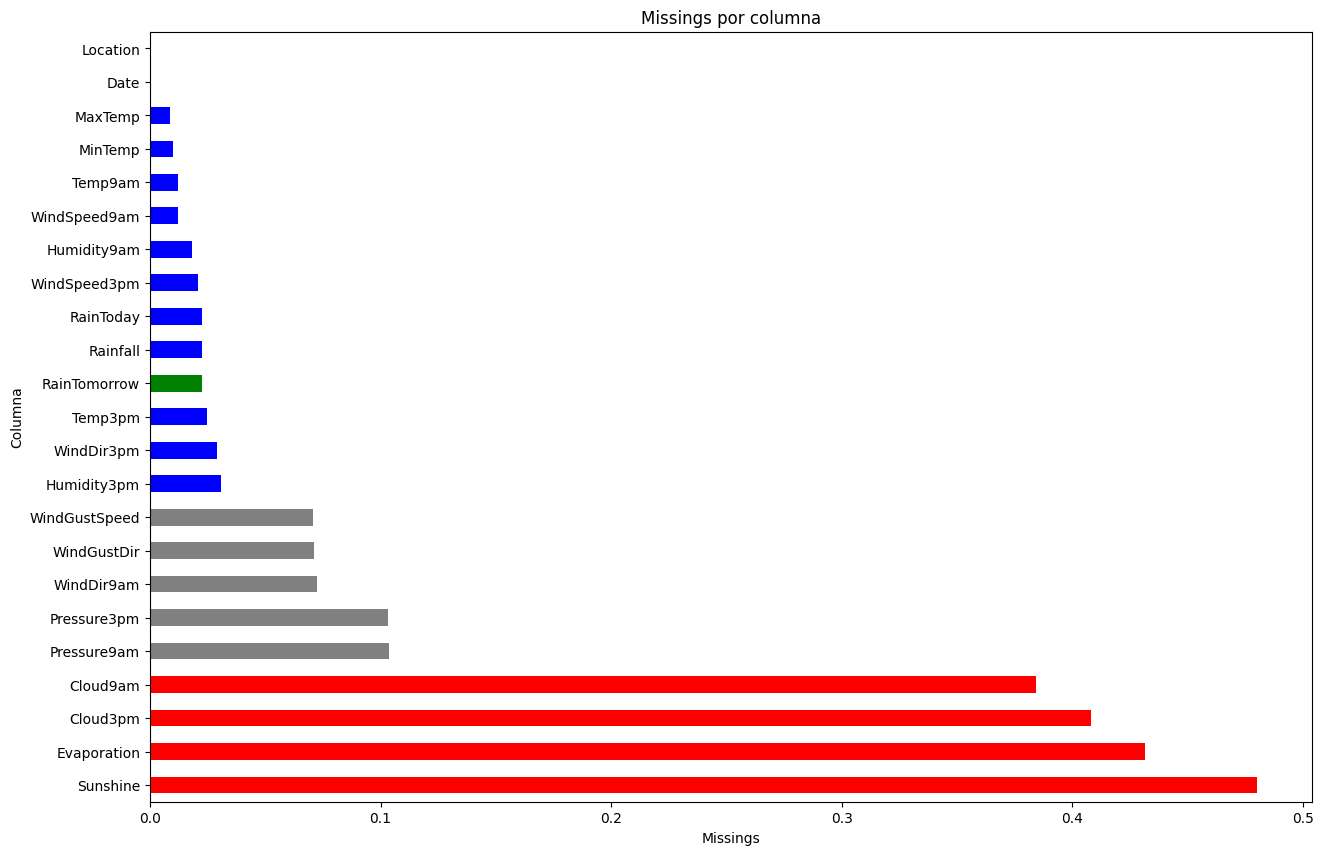

In [11]:
# Grafiquemos..

# Defino primero una barra de color
colors = ['green' if col == target 
            else 'red' if df_null[col] > 0.30 
            else 'blue' if df_null[col] < 0.05 
            else 'gray' for col in df_null.index]

plt.figure(figsize=(15, 10))
df_null.plot(kind='barh', color=colors)
plt.xlabel('Missings')
plt.ylabel('Columna')
plt.title('Missings por columna')

plt.show()

**OBSERVACIONES:**

- Salvo la fecha de la toma de datos `Date` como la localización `Location`, el resto de los *features* presenta *missings* en mayor o menor medida.

- Los atributos `Sunshine`, `Evaporation`, `Cloud3pm` y `Cloud9am` presentan entre un 30% y 50% de datos faltantes.

- El restos de los atributos tienen menos del 10% de datos faltantes.

- La variable *target* `RainTomorrow` presenta un 2.2% de datos faltantes.

- Se observan 2 tipos de variables: numéricas (data type: float64) y categóricas (data type: object).

- La columna `Date` necesita ser convertida a formato de pandas tipo "datetime".

In [12]:
# Convierto la variable 'Date' a formato tipo "datetime" de Pandas
rains['Date'] = pd.to_datetime(rains['Date'])

# Extraigo el mes y el año de  la columna 'Date'
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month

In [13]:
# Veamos algo de información estadística
rains.describe()

Date        MinTemp        MaxTemp  \
count                         145460  143975.000000  144199.000000   
mean   2013-04-04 21:08:51.907053568      12.194034      23.221348   
min              2007-11-01 00:00:00      -8.500000      -4.800000   
25%              2011-01-11 00:00:00       7.600000      17.900000   
50%              2013-06-02 00:00:00      12.000000      22.600000   
75%              2015-06-14 00:00:00      16.900000      28.200000   
max              2017-06-25 00:00:00      33.900000      48.100000   
std                              NaN       6.398495       7.119049   

            Rainfall   Evaporation      Sunshine  WindGustSpeed  \
count  142199.000000  82670.000000  75625.000000  135197.000000   
mean        2.360918      5.468232      7.611178      40.035230   
min         0.000000      0.000000      0.000000       6.000000   
25%         0.000000      2.600000      4.800000      31.000000   
50%         0.000000      4.800000      8.400000      39.000000   
75%         0.800000      7.400000     10.600000      48.000000   
max       371.000000    145.000000     14.500000     135.000000   
std         8.478060      4.193704      3.785483      13.607062   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  143693.000000  142398.000000  142806.000000  140953.000000   
mean       14.043426      18.662657      68.880831      51.539116   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   
std         8.915375       8.809800      19.029164      20.795902   

        Pressure9am    Pressure3pm      Cloud9am      Cloud3pm        Temp9am  \
count  130395.00000  130432.000000  89572.000000  86102.000000  143693.000000   
mean     1017.64994    1015.255889      4.447461      4.509930      16.990631   
min       980.50000     977.100000      0.000000      0.000000      -7.200000   
25%      1012.90000    1010.400000      1.000000      2.000000      12.300000   
50%      1017.60000    1015.200000      5.000000      5.000000      16.700000   
75%      1022.40000    1020.000000      7.000000      7.000000      21.600000   
max      1041.00000    1039.600000      9.000000      9.000000      40.200000   
std         7.10653       7.037414      2.887159      2.720357       6.488753   

            Temp3pm           Year          Month  
count  141851.00000  145460.000000  145460.000000  
mean       21.68339    2012.769751       6.399615  
min        -5.40000    2007.000000       1.000000  
25%        16.60000    2011.000000       3.000000  
50%        21.10000    2013.000000       6.000000  
75%        26.40000    2015.000000       9.000000  
max        46.70000    2017.000000      12.000000  
std         6.93665       2.537684       3.427262

**OBSERVACIONES:**

- Se observan varias columnas con *outliers*, por ejemplo, `Rainfall` presenta un valor máximo de 371 cuando el 75% de los datos son menores a 0.80 y el 50% tiene cero. En ese atributo particular, se debe a que la mayor parte del tiempo, no llueve.

#### 3.4 Análisis del target

In [14]:
rains[target].nunique()

2

In [15]:
rains[target].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
rains[target].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [17]:
rains[target].value_counts()/ninstances

RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

**OBSERVACIONES:**
- La variable objetivo es binaria y toma valores **Yes** o **No**.

- Se tiene un 75.8% de casos en donde no llueve (No) y un 21.9% donde (Yes). El porcentaje restante correponde al 2.2% de datos faltantes.

- El target esta desbalanceado con una mayoría de casos en los que no se registraron lluvias.

A las instancias del *target* donde se tiene *missings*, se las saca del dataset directamente.

In [18]:
rains.dropna(subset=['RainTomorrow'], inplace=True)
assert(len(rains[rains['RainTomorrow'].isnull()]) == 0)


### 4. TRAIN & TEST SET

In [19]:
rains_x = rains.drop(columns=['RainTomorrow'])  # Drop the target column from features
rains_y = rains['RainTomorrow']                 # Target variable

# Split the dataset
rnd_seed = 42   # For reproducibility         
ftest = 0.20    # Fracción de datos para "train"

X_train, X_test, y_train, y_test = train_test_split(
                                                    rains_x, rains_y, 
                                                    test_size=ftest,        
                                                    stratify=rains_y,       # Keep class proportions the same
                                                    random_state=rnd_seed         
                                                    )
X_train["RainTomorrow"] = y_train
rains = X_train

print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))

Dimension de X_train: (113754, 25)
Valores de y_train: 113754
Dimension de X_test: (28439, 24)
Valores de y_test: 28439


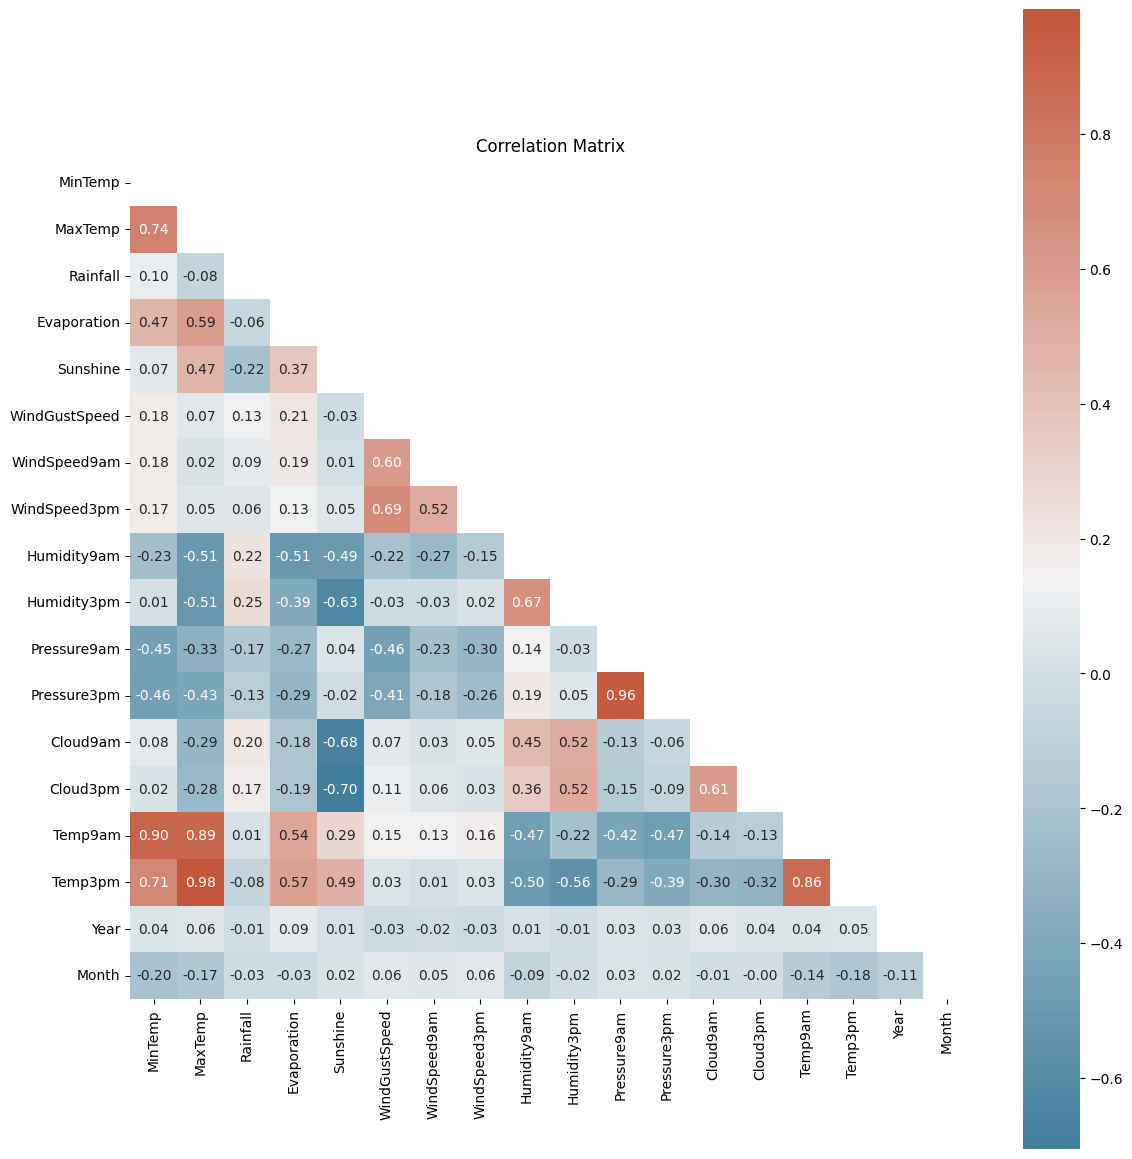

In [20]:
plt.figure(figsize=(12, 12))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(rains.corr(numeric_only=True)))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(rains.corr(numeric_only=True), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()

**OBSERVACIONES:**
- Hay una fuerte correlación entre `Temp9am`y `Temp3am`, así como de estos 2 atributos con la `MinTemp`y `MaxTemp`.
- Hay una buena correlación entre `WindGustSpeed` y sus equivalentes a las 9AM y 3PM.
- En términos generales, hay una buena correlación entre los mismos pares de variables medidos por la mañana y por la tarde (p.ej., `Temp9am` y `Temp3pm`). 

**PREGUNTAS:**
- ¿Puedo quedarme solo con uno de esos pares?¿Con el que tenga menos missings?
- ¿En caso de missings, puedo usar uno para estimar el otro?

In [21]:
def get_corr_var(corr_matrix, threshold):
    corr_pairs = np.argwhere((corr_matrix < -threshold) | (corr_matrix > threshold))
    corr_columns = []
    
    for pair in corr_pairs:
        row, col = pair
        if row < col:
            found = False
            for corr_set in corr_columns:
                if corr_matrix.index[row] in corr_set or corr_matrix.columns[col] in corr_set:
                    corr_set.add(corr_matrix.index[row])
                    corr_set.add(corr_matrix.columns[col])
                    found = True
                    break
            if not found:
                corr_columns.append({corr_matrix.index[row], corr_matrix.columns[col]})
    
    return [list(corr_set) for corr_set in corr_columns]

# Llamada a la función para obtener pares de columnas correlacionadas por encima de cierto umbral
umbral = 0.85  # Establece tu umbral de correlación aquí
columnas_correlacionadas = get_corr_var(rains.corr(numeric_only=True), umbral)


print(f"Grupo de atributos con correlación mayor a {umbral}:",columnas_correlacionadas)
print(f"Cantidad de grupos de atributos con correlación mayor a {umbral}:",len(columnas_correlacionadas))

Grupo de atributos con correlación mayor a 0.85: [['Temp3pm', 'MaxTemp', 'Temp9am', 'MinTemp'], ['Pressure3pm', 'Pressure9am']]
Cantidad de grupos de atributos con correlación mayor a 0.85: 2


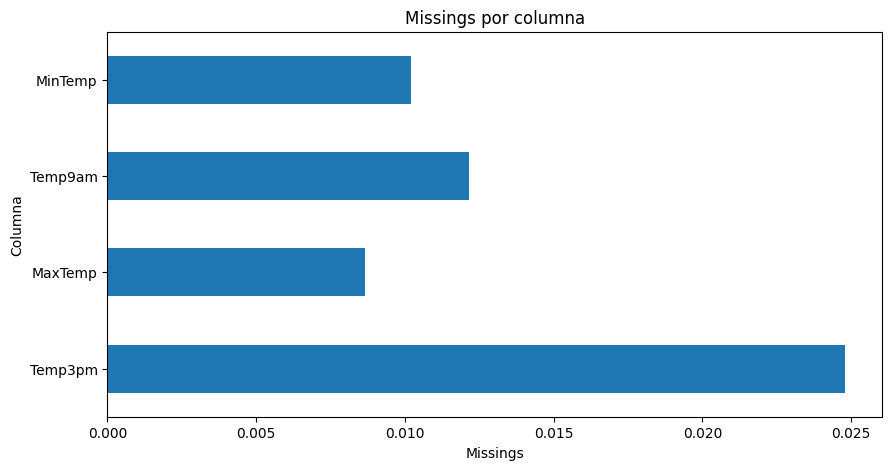

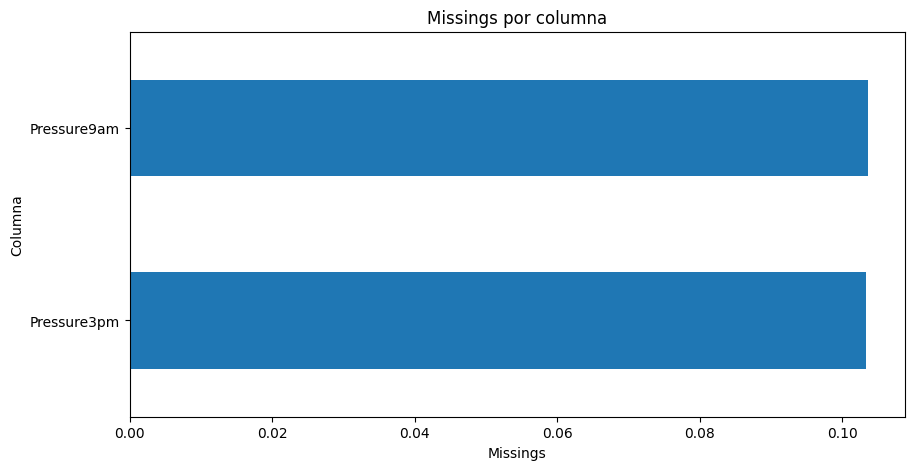

In [22]:
# Grafiquemos los missings para cada grupo...

for i in range(len(columnas_correlacionadas)):
    target = 'RainTomorrow'
    plt.figure(figsize=(10, 5))
    df_null[columnas_correlacionadas[i]].plot(kind='barh')
    plt.xlabel('Missings')
    plt.ylabel('Columna')
    plt.title('Missings por columna')

    plt.show()

**OBSERVACIONES:**
- En relación a la temperatura, se observa que los valores mínimos y máximos representan atributos más robustos que la temperatura a las 9AM y 3PM al tener menos *missings*. Podría obtarse por un modelo que solo retenga estos dos *features*.

- Respecto de la presión, vemos que ambos valores tienen una misma cantidad de missings. Posiblemente correspondan a la misma instancia (día) y se deba a algún problema con la toma de datos.

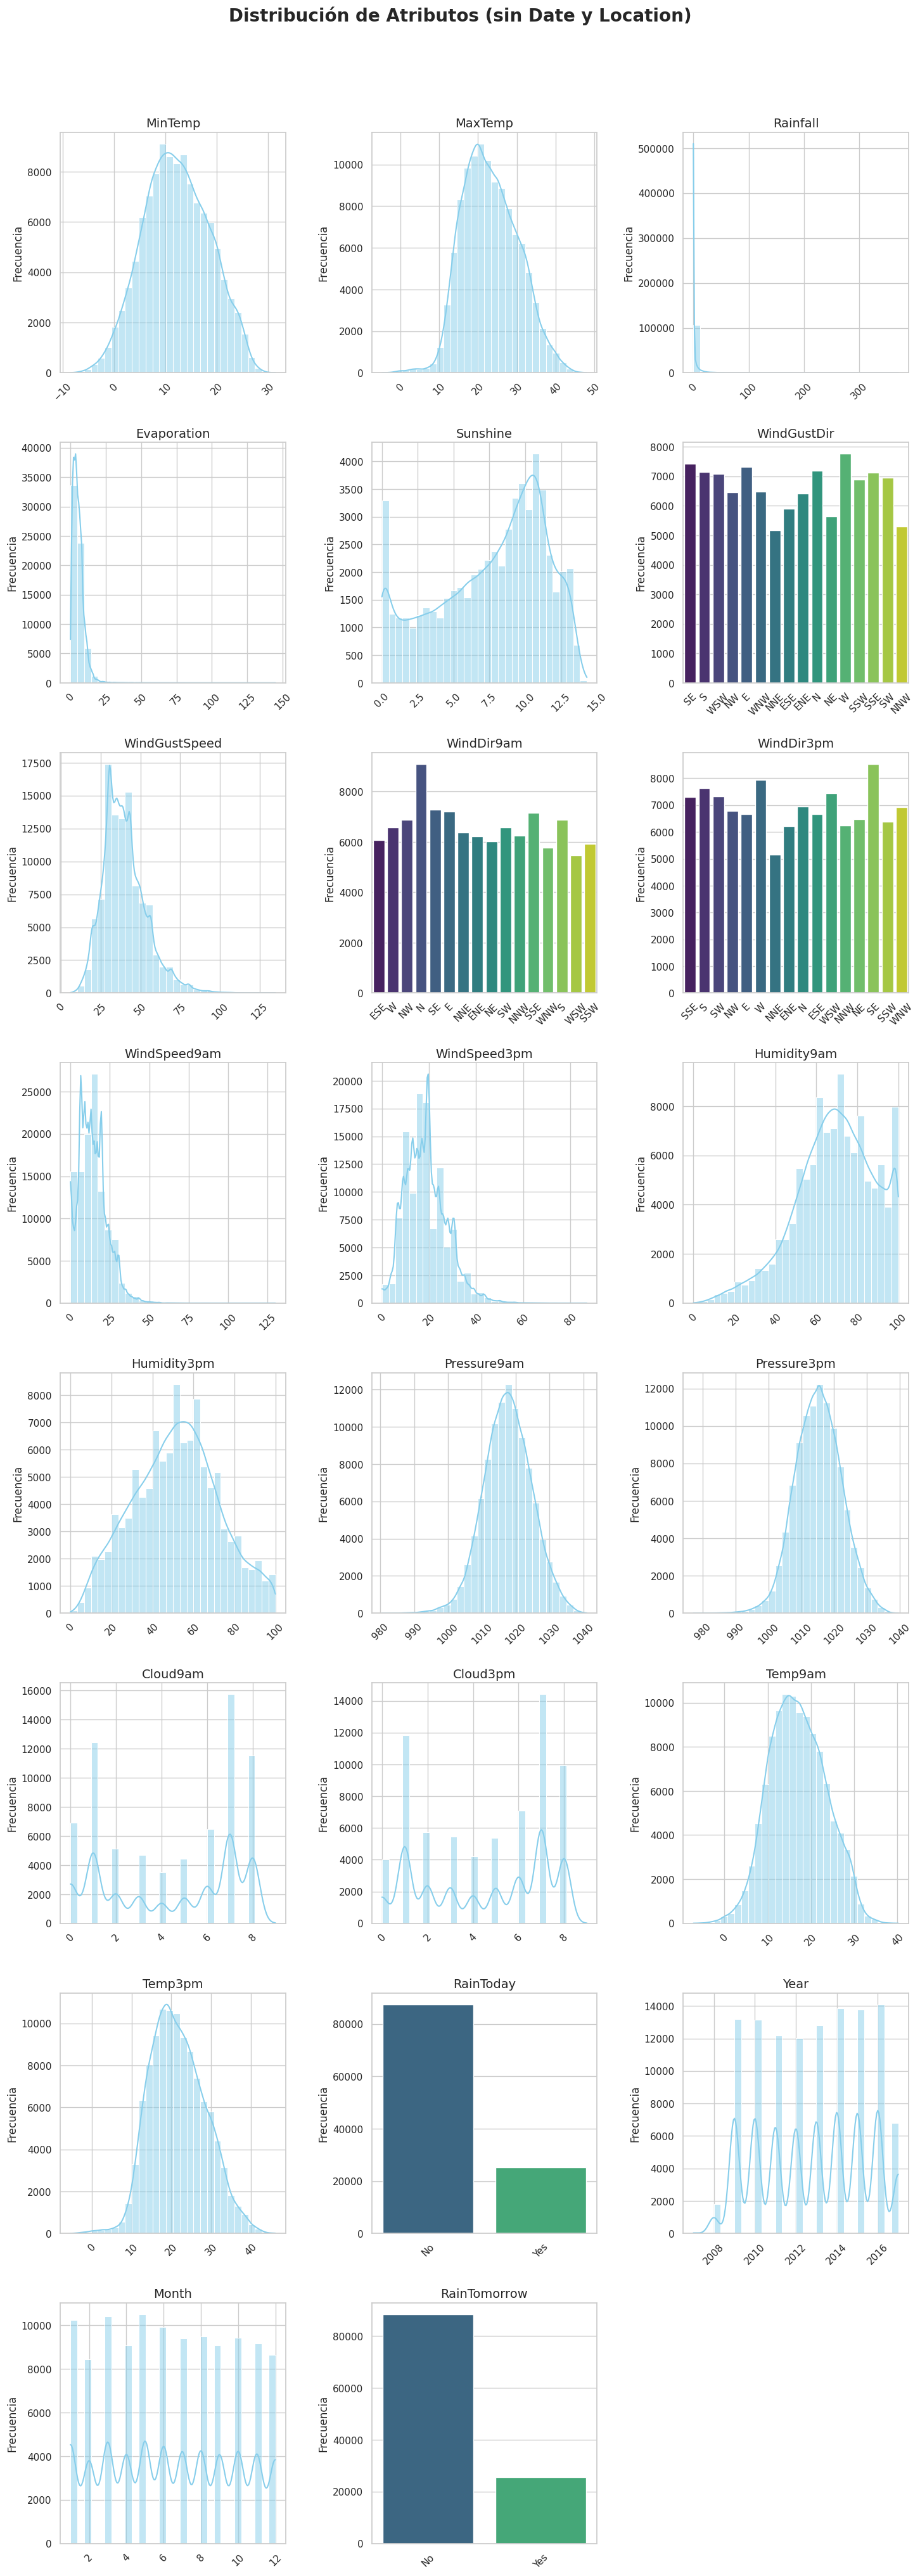

In [23]:
# Veamos los histrogramas de distribución de los atributos

# Excluir columnas "Date" y "Location"
columns_to_exclude = ["Date", "Location"]
filtered_columns = [col for col in rains.columns if col not in columns_to_exclude]

# Configuración de estilo
sns.set(style="whitegrid")

# Crear la figura y los ejes
num_cols = 3
num_rows = (len(filtered_columns) + num_cols - 1) // num_cols  # Calcular filas necesarias
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar el array de ejes

plt.suptitle('Distribución de Atributos (sin Date y Location)', fontsize=20, fontweight='bold', y=1.02)

for i, column in enumerate(filtered_columns):
    is_cat = rains[column].dtype == 'object'
    if is_cat:
        sns.countplot(data=rains, x=column, ax=axes[i], palette='viridis')
    else:
        sns.histplot(rains[column], kde=True, ax=axes[i], color='skyblue', bins=30)
    
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas x si es necesario

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

# Ajustar el diseño
fig.tight_layout(pad=2.0)
plt.show()

Text(0.5, 1.0, 'Disparidad de dias de lluvia en Australia 2007-2016')

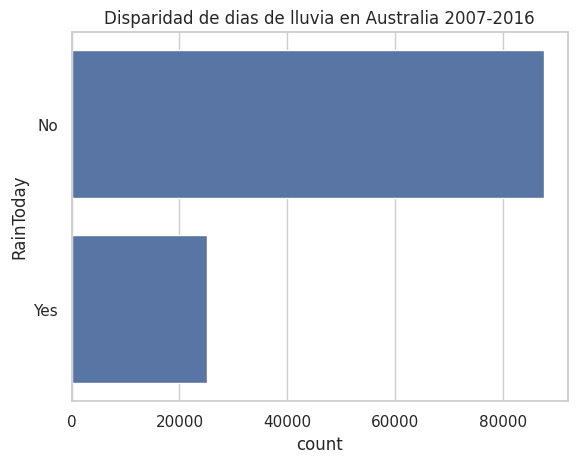

In [24]:
sns.countplot(rains['RainToday'])
plt.title('Disparidad de dias de lluvia en Australia 2007-2016')

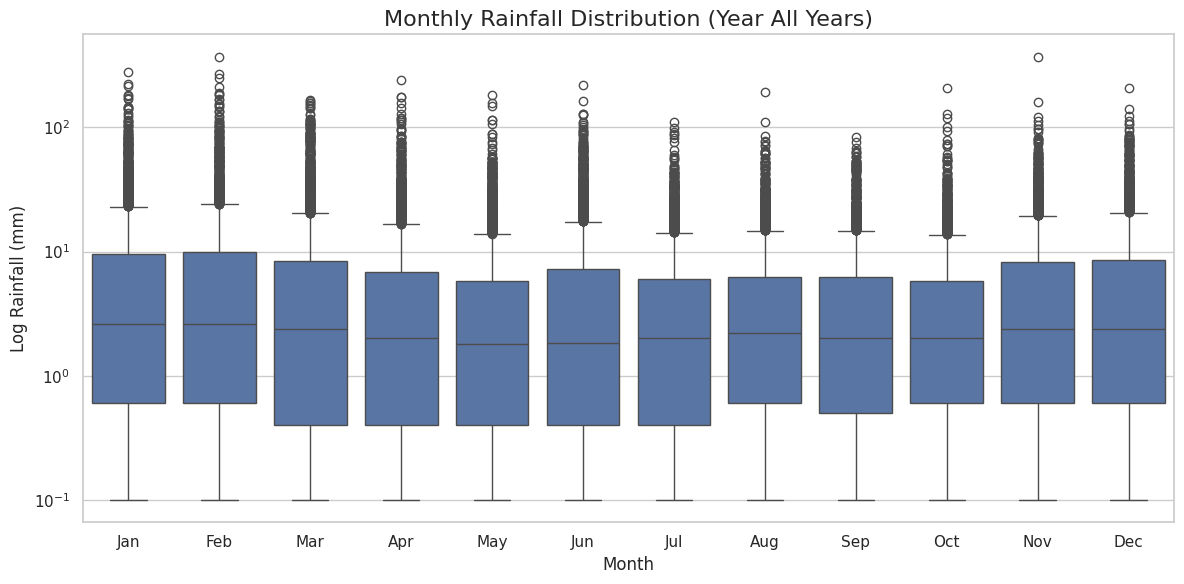

In [25]:
def monthly_rains_box(df, year=None):
    # Create a boxplot of 'Rainfall' by 'Month' for all years
    plt.figure(figsize=(12, 6))
    df_with_rains = df[df['Rainfall'] > 0]
    ax = sns.boxplot(x='Month', y='Rainfall', data=df_with_rains if year is None else df_with_rains[df['Date'].dt.year == year])
    ax.set_yscale('log')

    # Customize the plot
    plt.title(f'Monthly Rainfall Distribution (Year {year if year else "All Years" })', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Log Rainfall (mm)', fontsize=12)
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Show the plot
    plt.tight_layout()
    plt.show()

monthly_rains_box(rains)


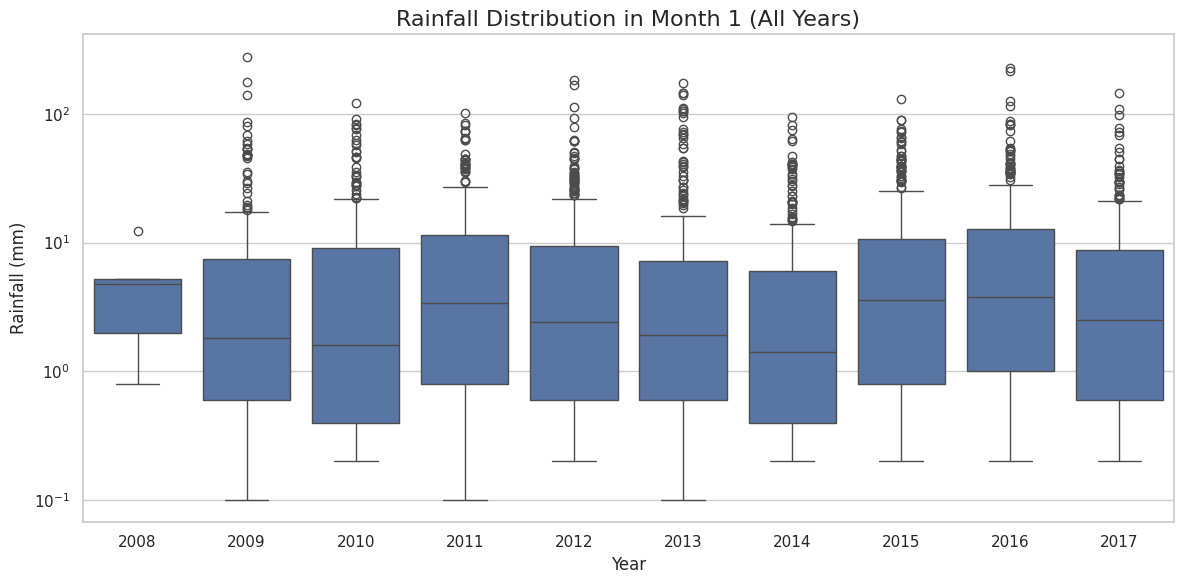

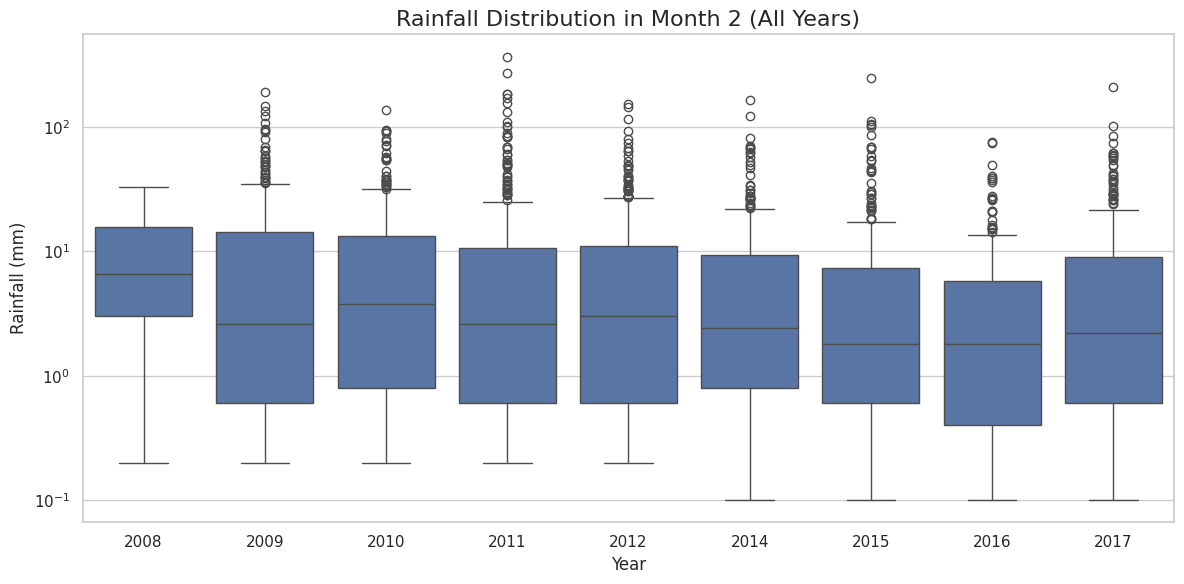

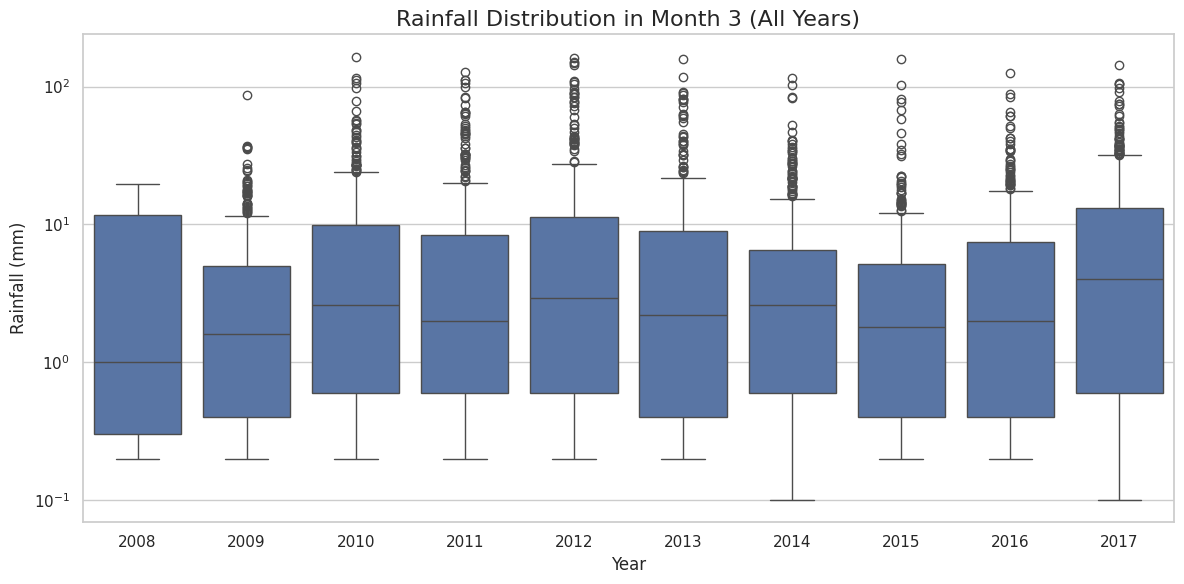

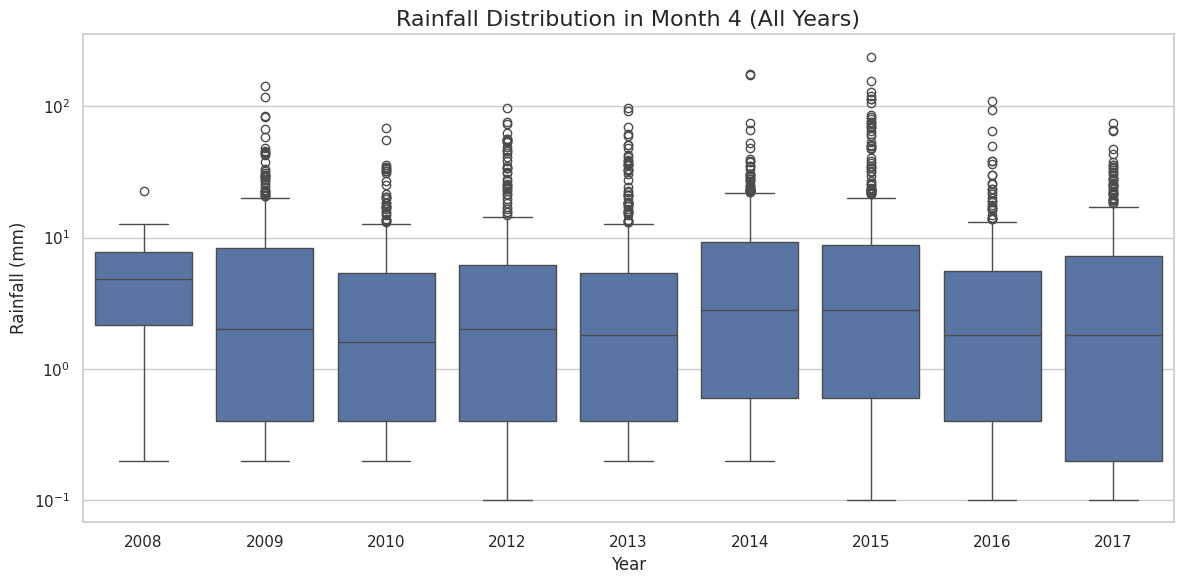

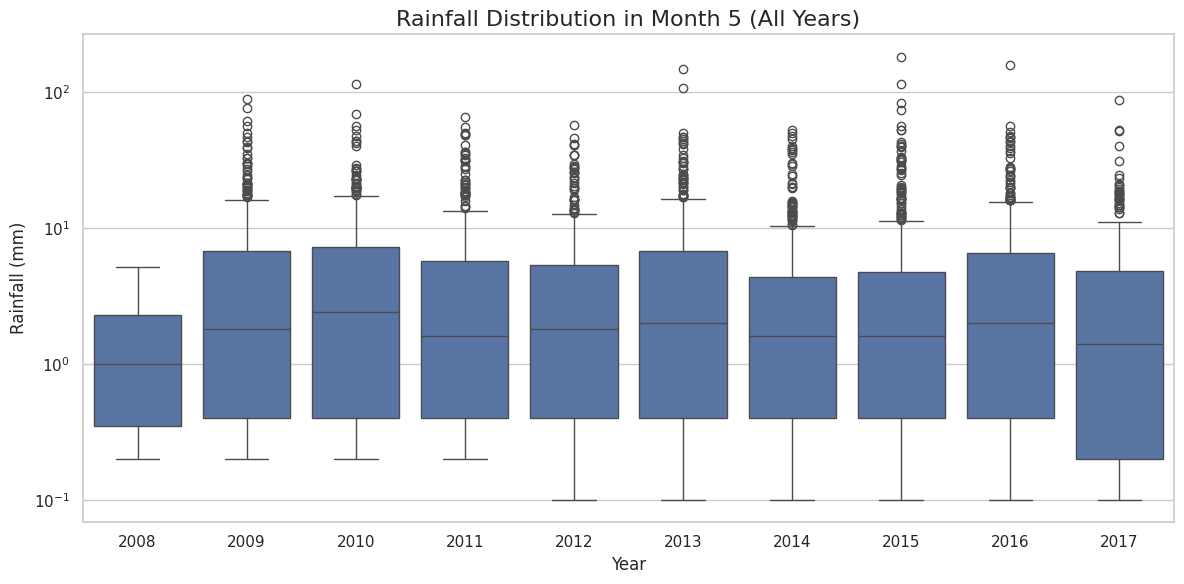

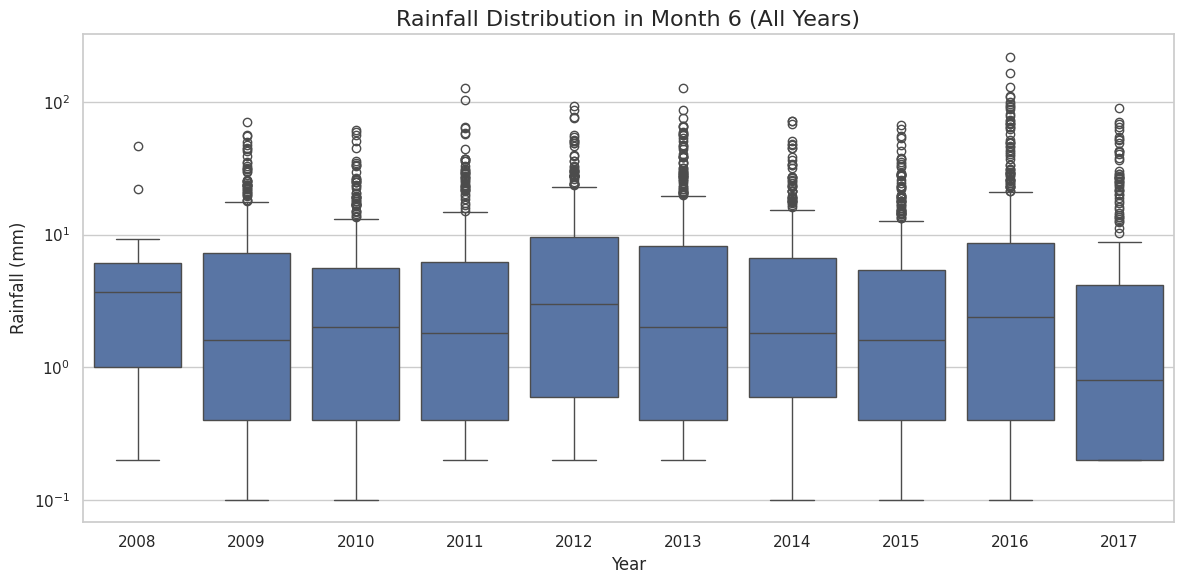

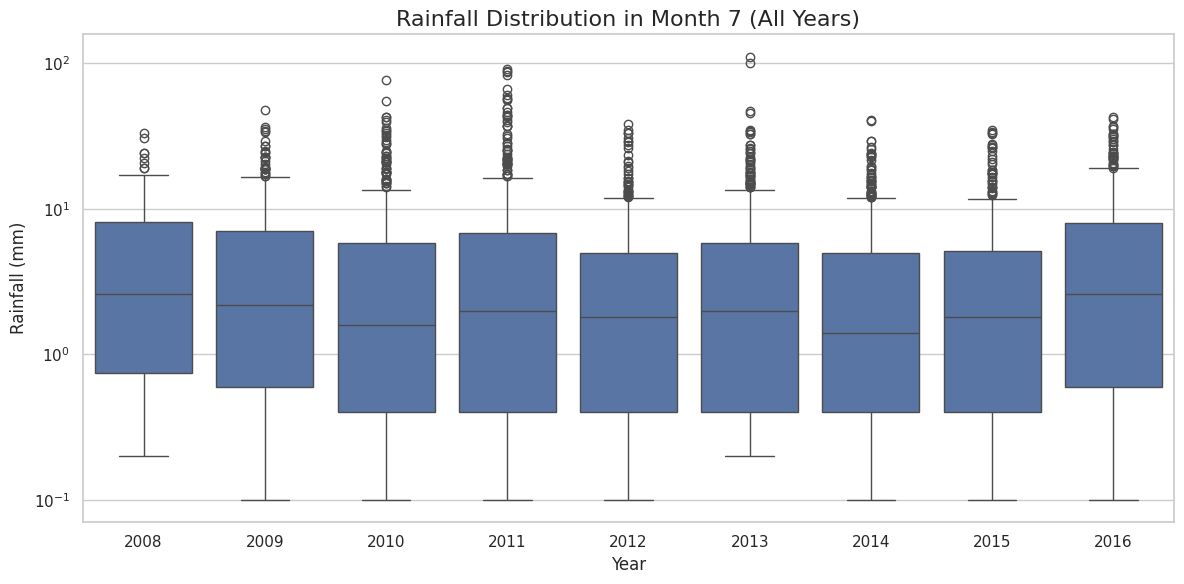

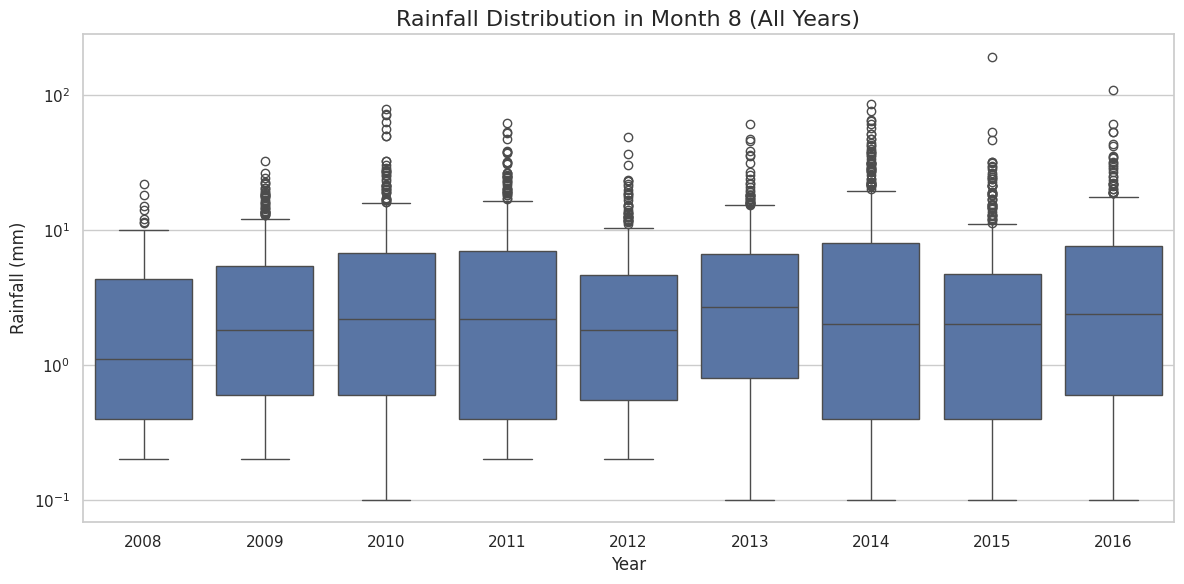

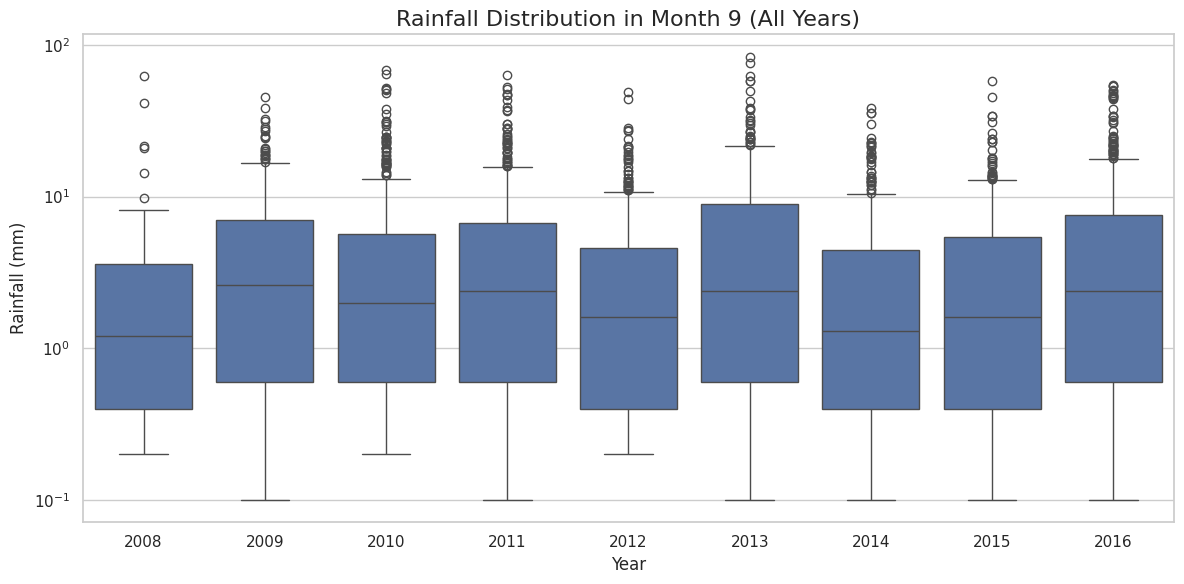

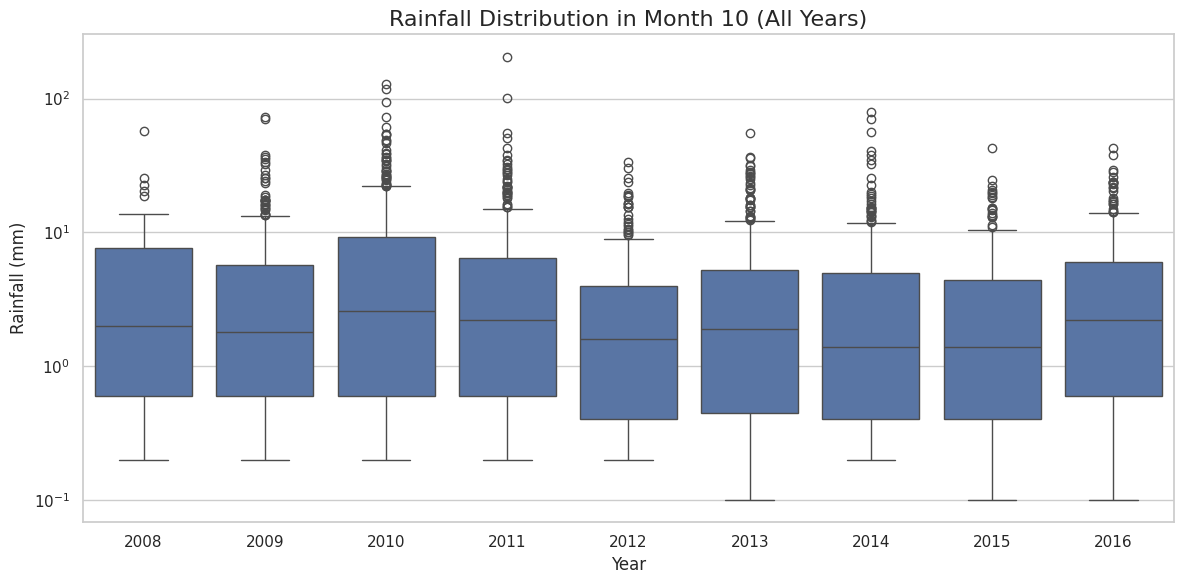

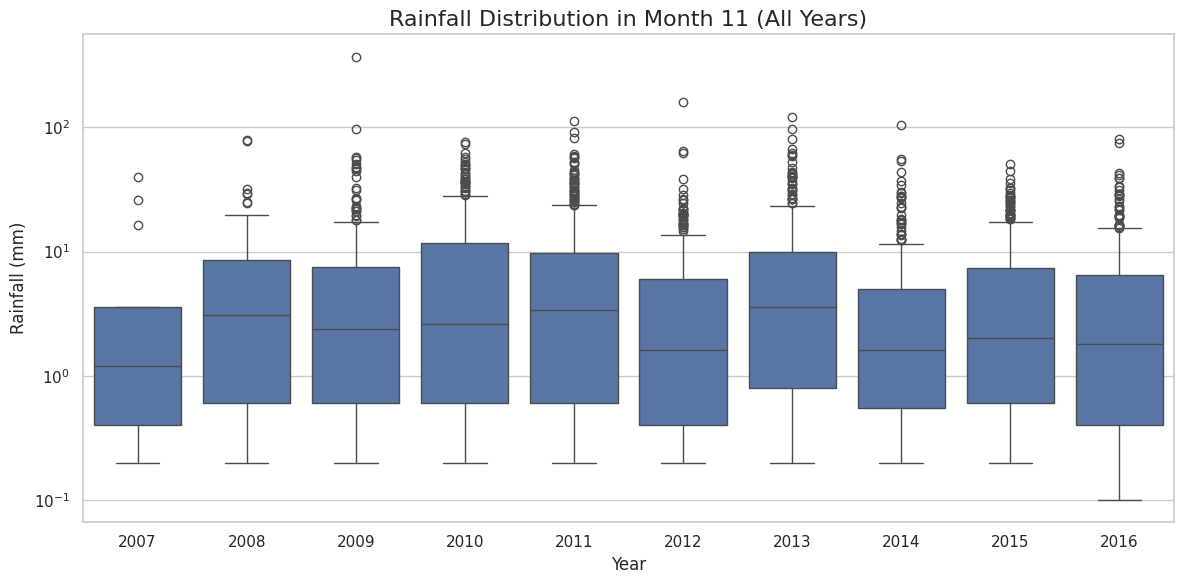

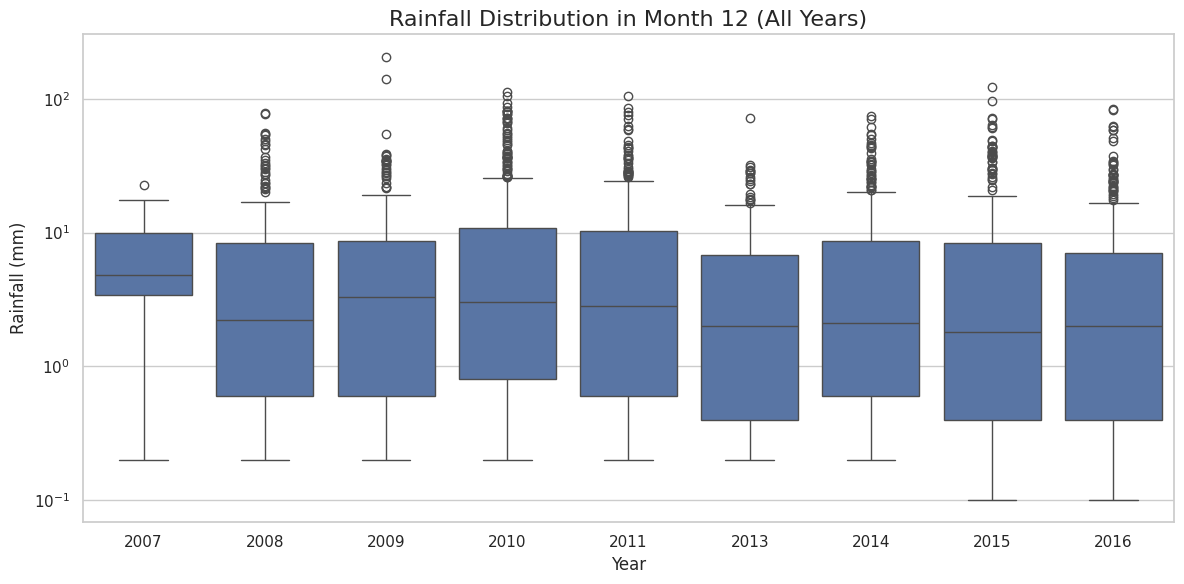

In [26]:
def historic_by_month_box(df, month):
    # Filter data to include only December of all years
    df_with_rains = df[df['Rainfall'] > 0]
    df_month = df_with_rains[(df_with_rains['Date'].dt.month == month) ]
    
    # Create a boxplot of 'Rainfall' for all Decembers
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='Year', y='Rainfall', data=df_month)
    ax.set_yscale('log')
    # Customize the plot
    plt.title(f'Rainfall Distribution in Month {month} (All Years)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
for i in range(1, 13):
    historic_by_month_box(rains, i)

In [27]:
rains['ConsecutiveRainDays'] = 0

# Track consecutive rainy days
consecutive_days = 0
for i in rains.index:
    if rains.loc[i, "RainToday"] == "Yes":
        consecutive_days += 1
    else:
        consecutive_days = 0
    rains.loc[i, 'ConsecutiveRainDays'] = consecutive_days


Text(0, 0.5, 'Consecutive Rain Days')

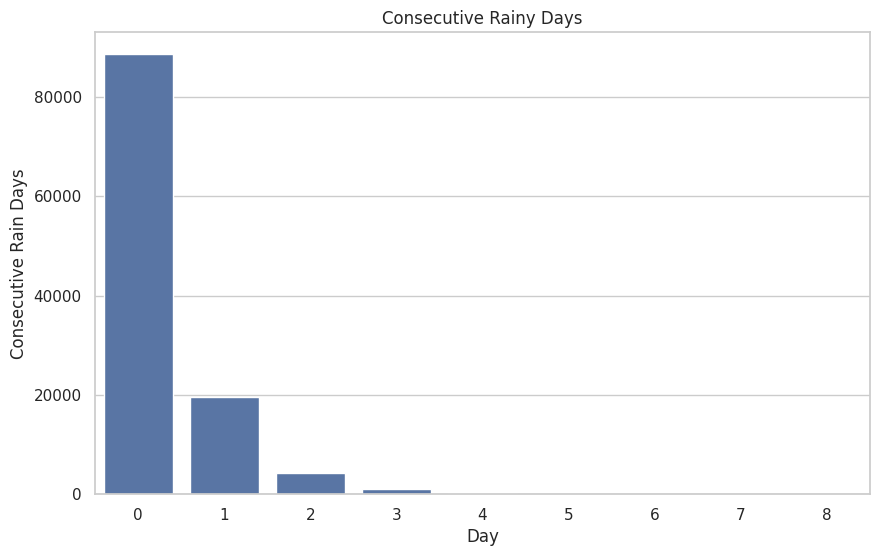

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    rains[['Date', 'ConsecutiveRainDays']].groupby('ConsecutiveRainDays').count().reset_index(),
    x='ConsecutiveRainDays',
    y='Date'
)
# ax.set_yscale('log')
ax.set_xticks(rains['ConsecutiveRainDays'].unique())

# Add labels and title
plt.title('Consecutive Rainy Days')

plt.xlabel('Day')
plt.ylabel('Consecutive Rain Days')


In [83]:
rains['RainRuns'] = 0

# Track consecutive rainy days
consecutive_days = 0
for i in rains.index:
    if rains.loc[i, "RainToday"] == "Yes":
        if consecutive_days < 0:
            consecutive_days = 1
        else:
            consecutive_days += 1
    else:
        if consecutive_days > 0:
            consecutive_days = -1
        else:
            consecutive_days -= 1
    rains.loc[i, 'RainRuns'] = consecutive_days

Text(0, 0.5, 'Rain Runs')

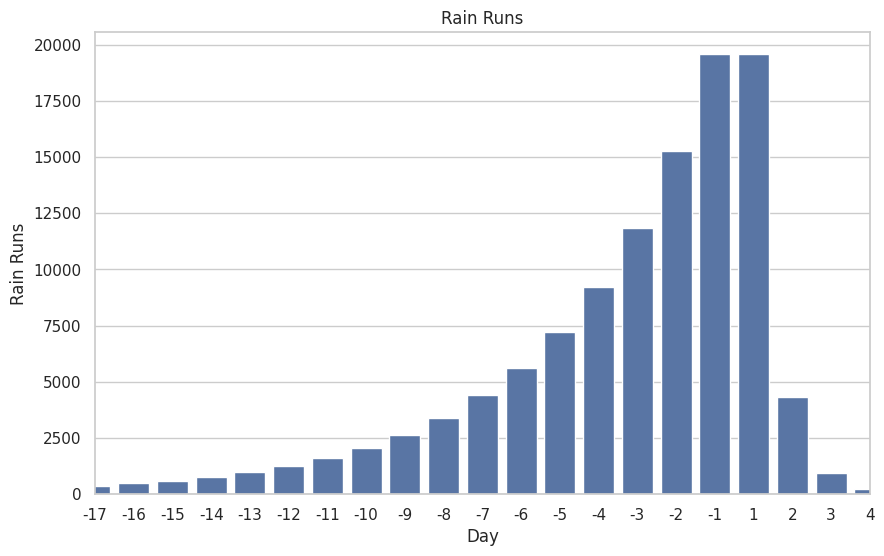

In [84]:
plt.figure(figsize=(10, 6))
runs = rains[['Date', 'RainRuns']].groupby('RainRuns').count().reset_index()
ax = sns.barplot(
    runs,
    x='RainRuns',
    y='Date'
)

plt.title('Rain Runs')
ax.set_xlim(20, 40)
plt.xlabel('Day')
plt.ylabel('Rain Runs')


Text(0, 0.5, 'Rain Runs')

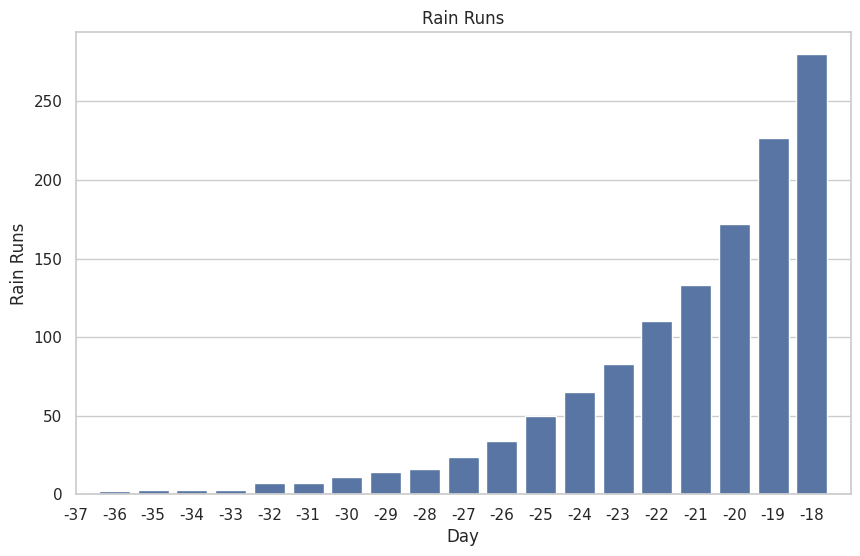

In [91]:
plt.figure(figsize=(10, 6))
runs = rains[['Date', 'RainRuns']].groupby('RainRuns').count().reset_index()
ax = sns.barplot(
    runs.iloc[:20],
    x='RainRuns',
    y='Date'
)

plt.title('Rain Runs')
ax.set_xlim(0, 20)
plt.xlabel('Day')
plt.ylabel('Rain Runs')


In [90]:
runs

RainRuns   Date
0        -37      1
1        -36      2
2        -35      3
3        -34      3
4        -33      3
5        -32      7
6        -31      7
7        -30     11
8        -29     14
9        -28     16
10       -27     24
11       -26     34
12       -25     50
13       -24     65
14       -23     83
15       -22    110
16       -21    133
17       -20    172
18       -19    227
19       -18    280
20       -17    367
21       -16    482
22       -15    603
23       -14    769
24       -13   1011
25       -12   1278
26       -11   1634
27       -10   2069
28        -9   2618
29        -8   3407
30        -7   4413
31        -6   5618
32        -5   7199
33        -4   9225
34        -3  11857
35        -2  15252
36        -1  19572
37         1  19571
38         2   4312
39         3    958
40         4    223
41         5     59
42         6      9
43         7      2
44         8      1

# Visualizations 

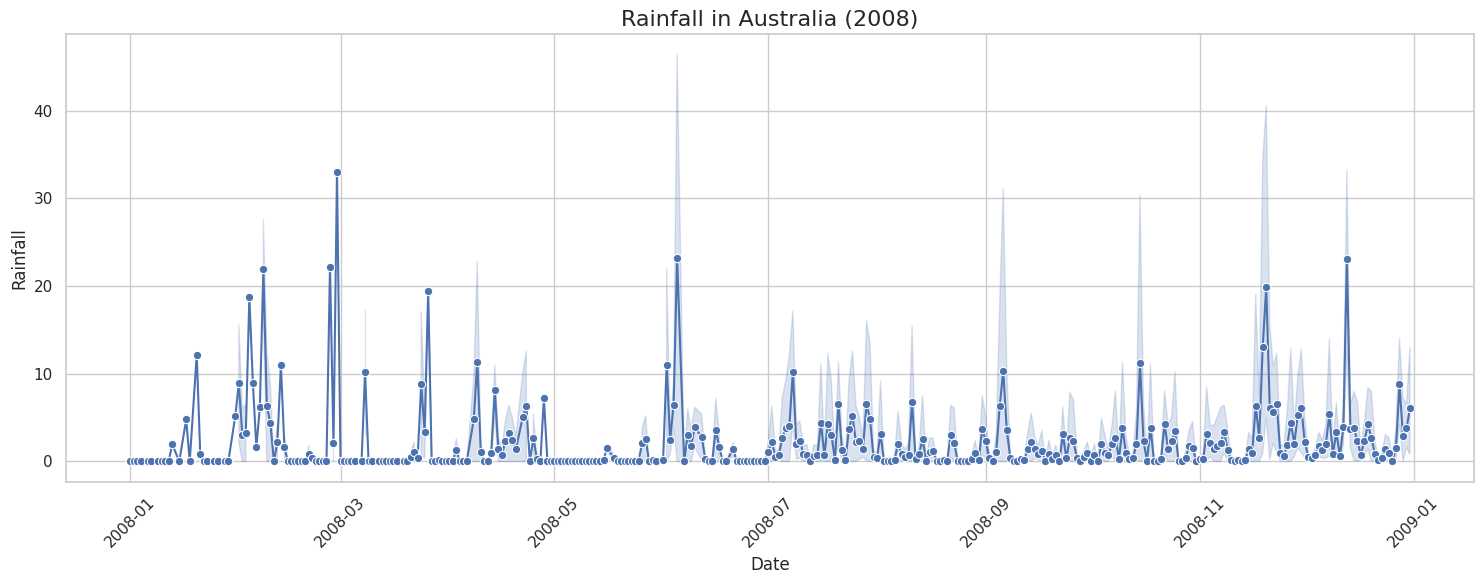

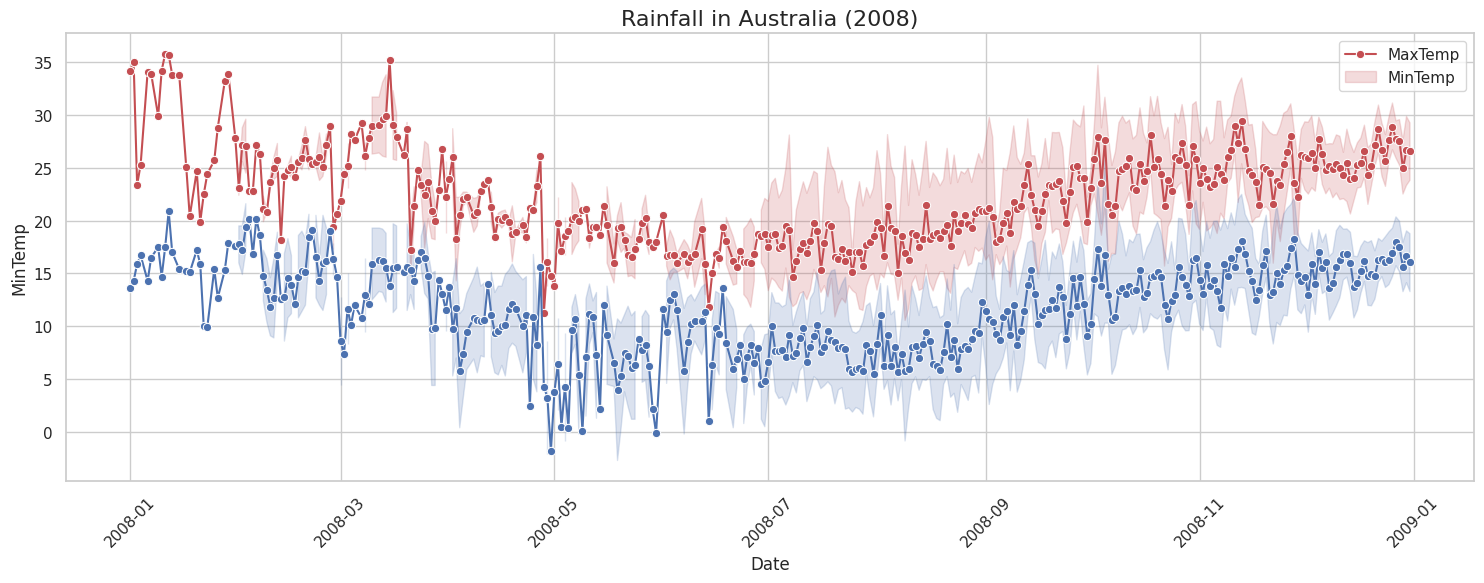

In [29]:
def plot_series(df, column, year, color='b'):
    first_year = rains[rains['Date'].dt.year == year]

    # Create a line plot of 'Rainfall' over time
    sns.lineplot(x='Date', y=column, data=first_year, marker='o', color=color)

    # Customize the plot
    plt.title(f'Rainfall in Australia ({year})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)  # Add grid

    # Show the plot


plt.figure(figsize=(15, 6))
plot_series(rains, 'Rainfall', 2008)
plt.show()
plt.figure(figsize=(15, 6))
plot_series(rains, 'MaxTemp', 2008, color='r')
plot_series(rains, 'MinTemp', 2008, color='b')
plt.legend(['MaxTemp', 'MinTemp'])
plt.show()


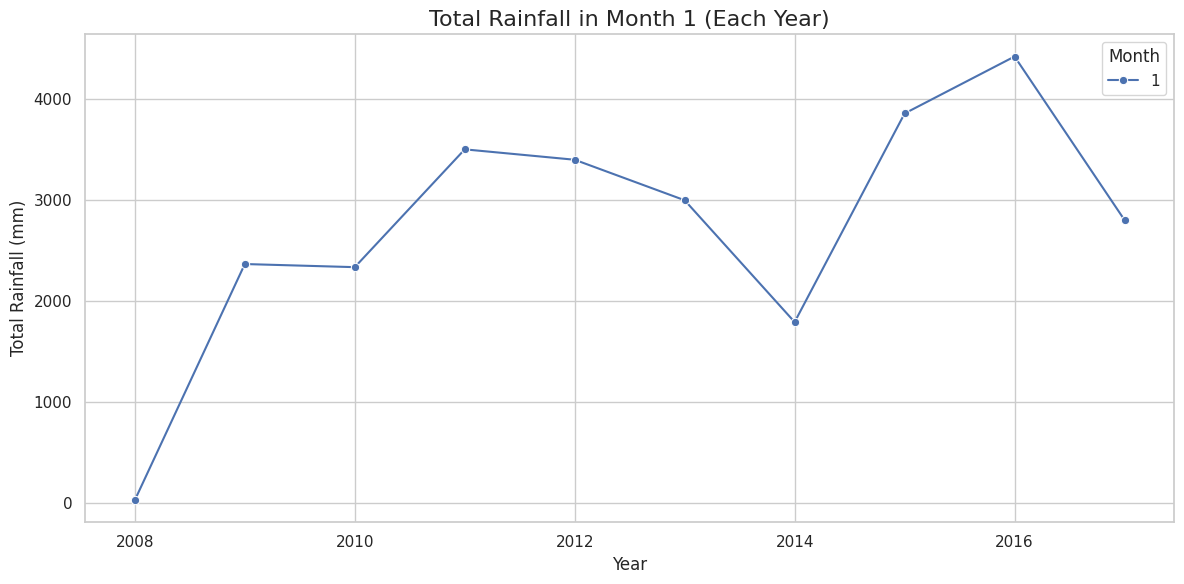

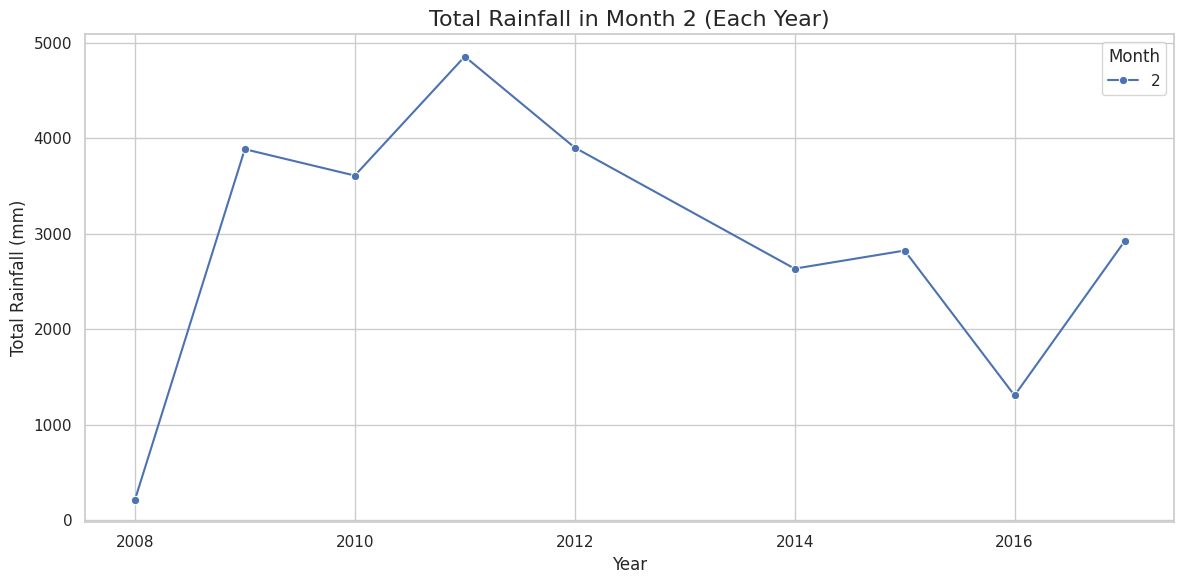

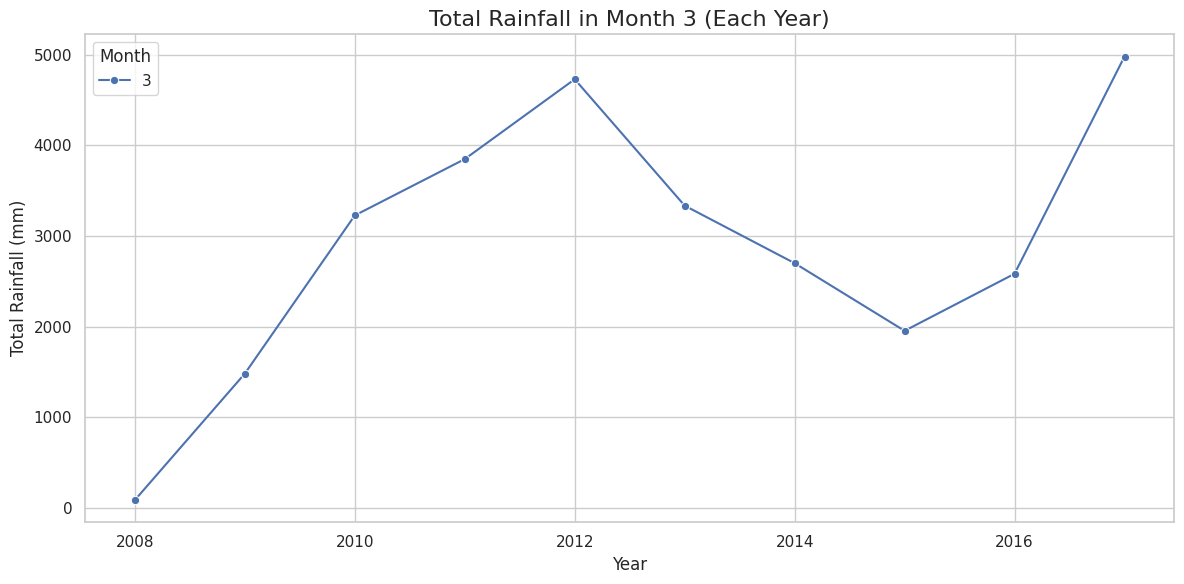

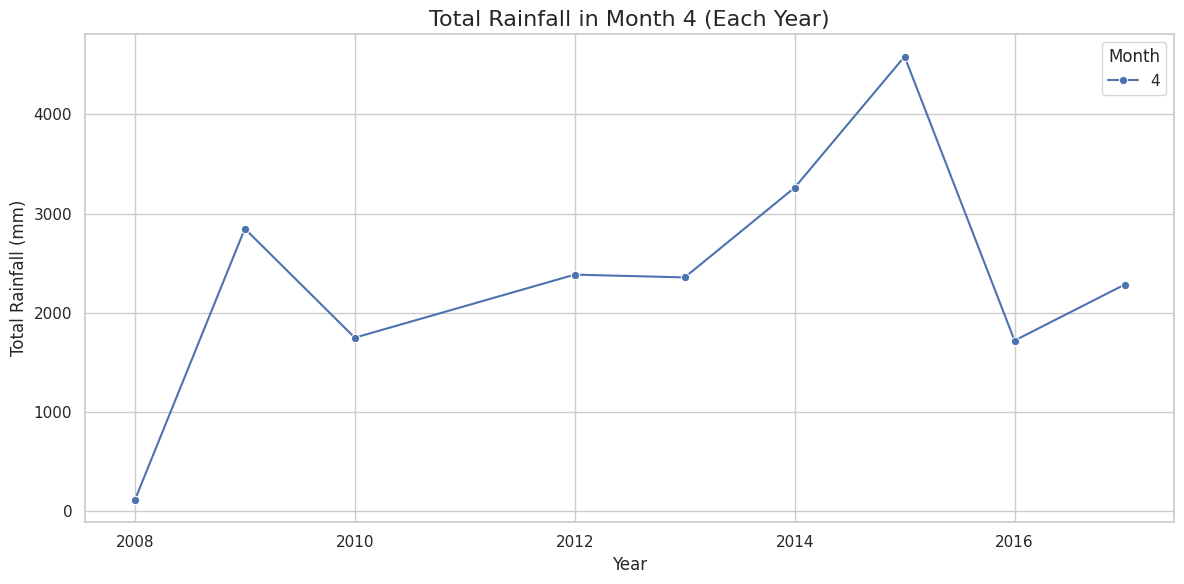

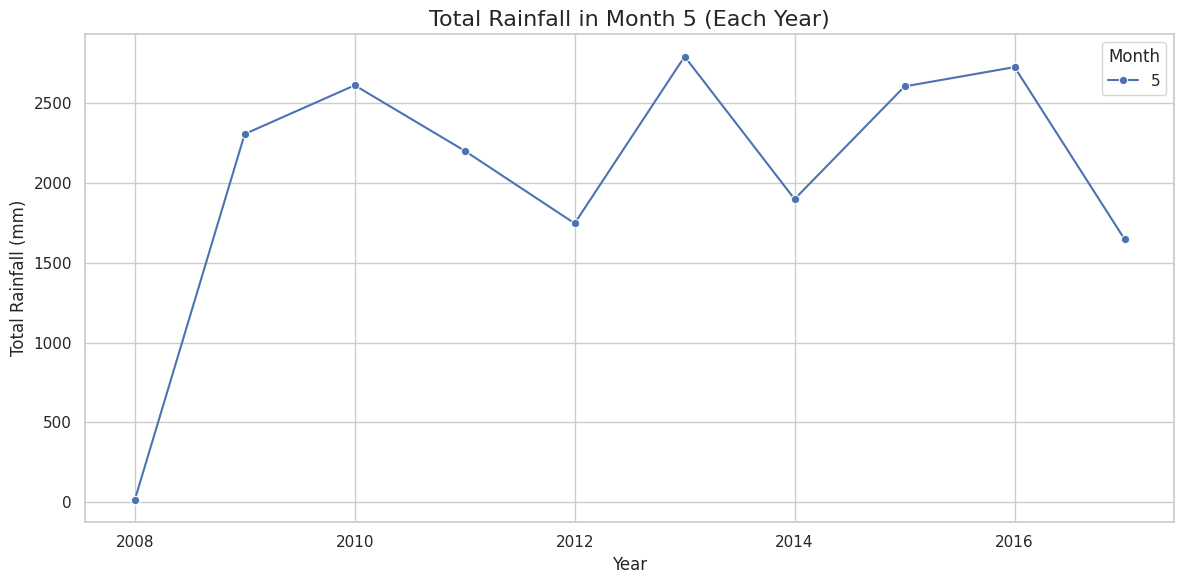

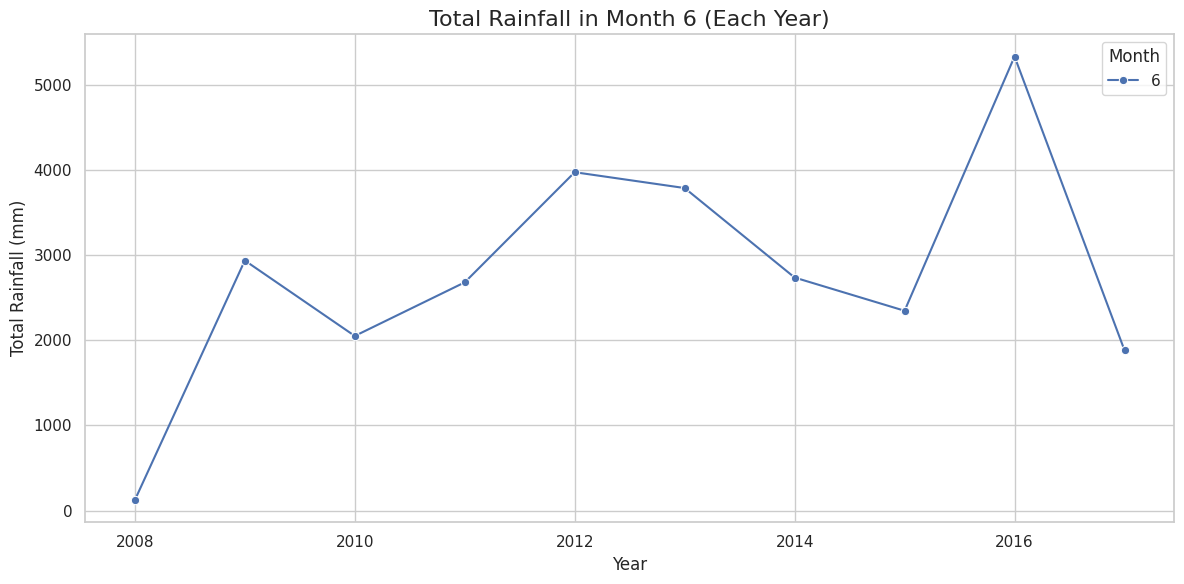

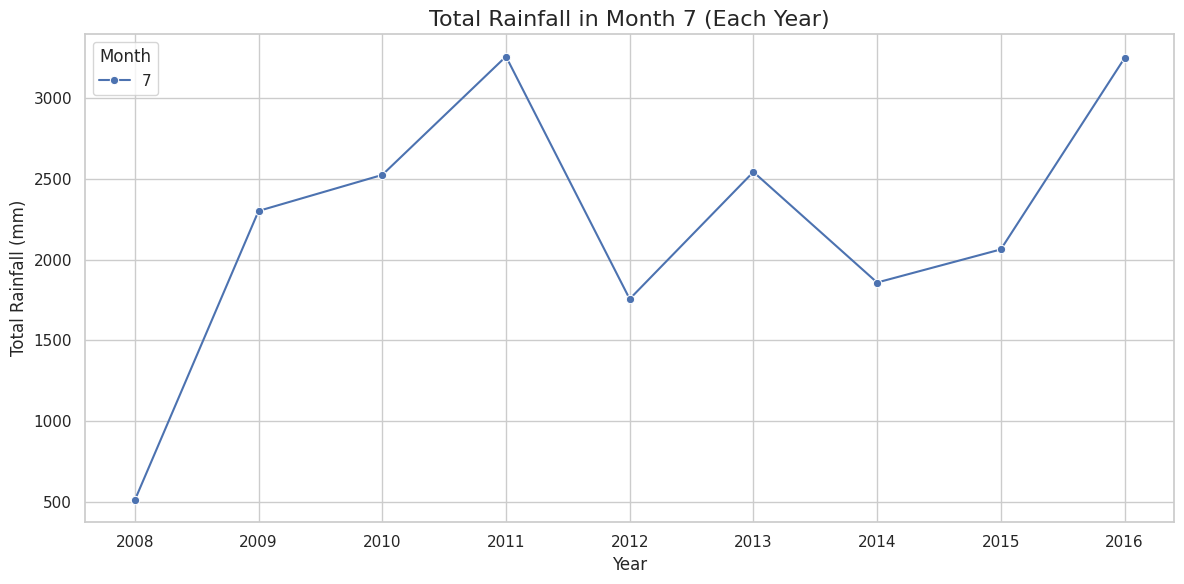

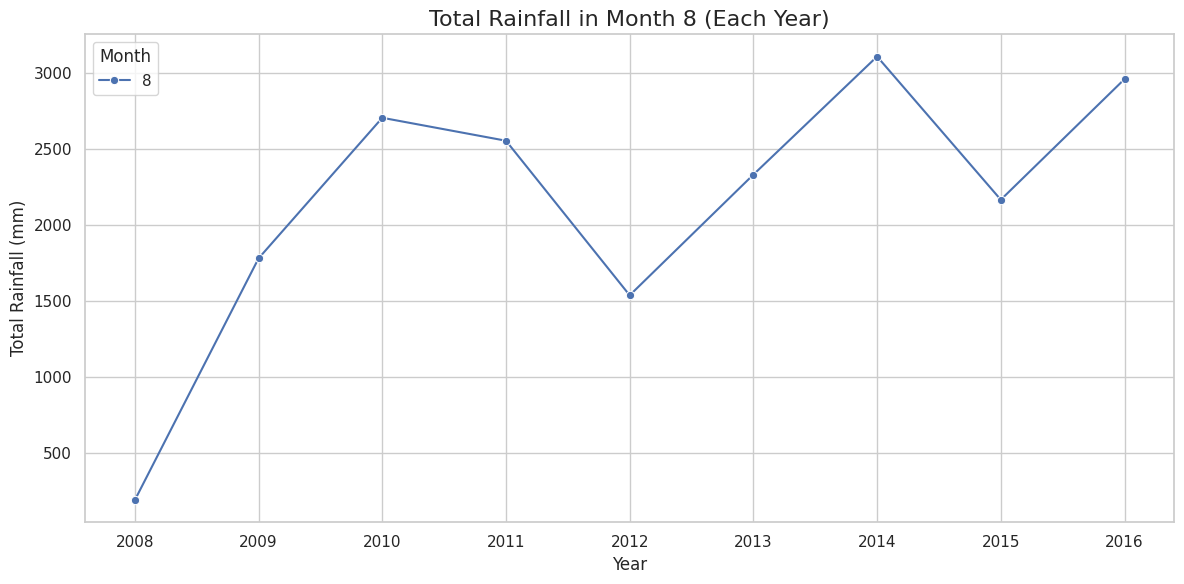

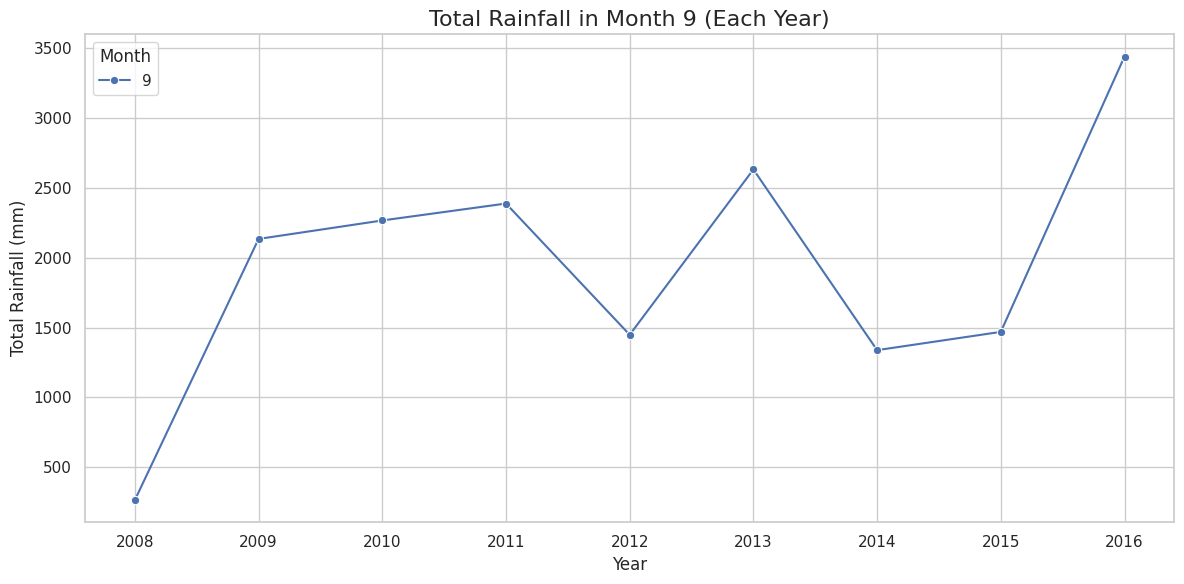

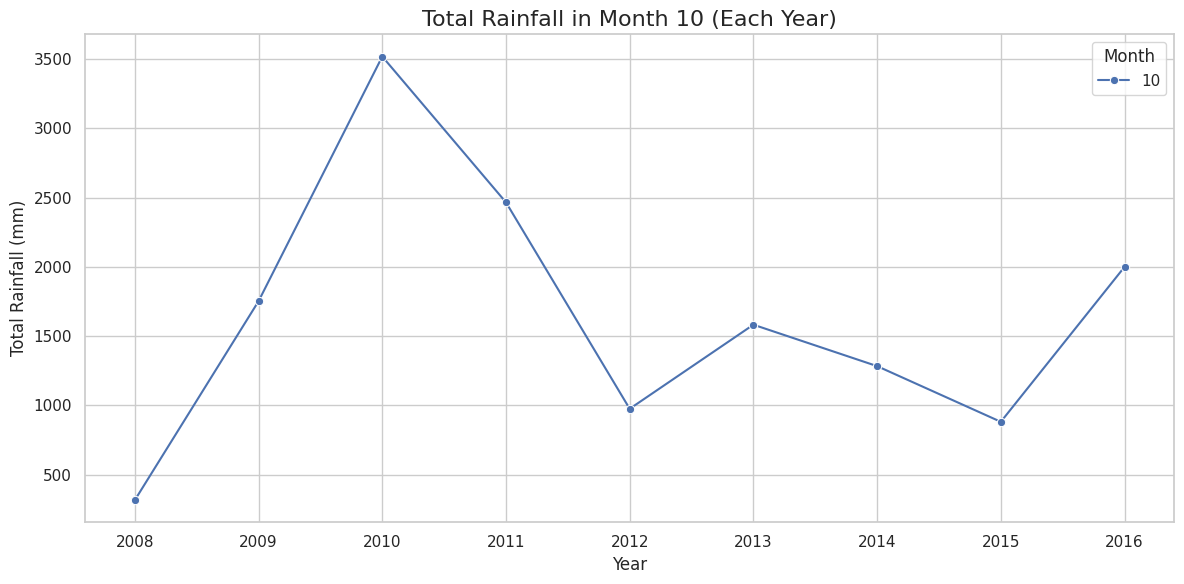

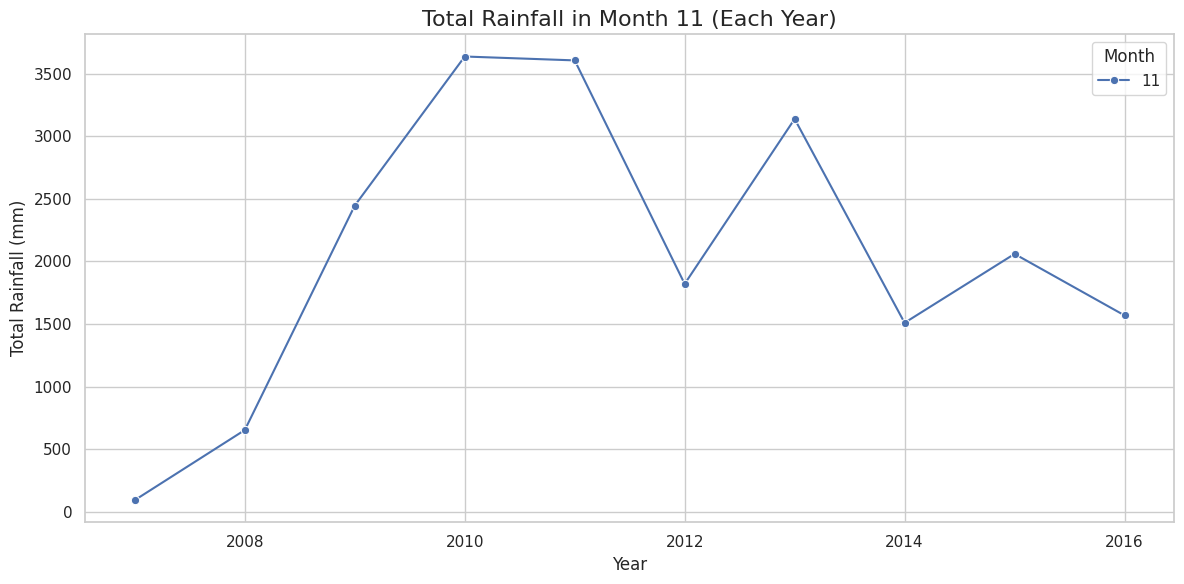

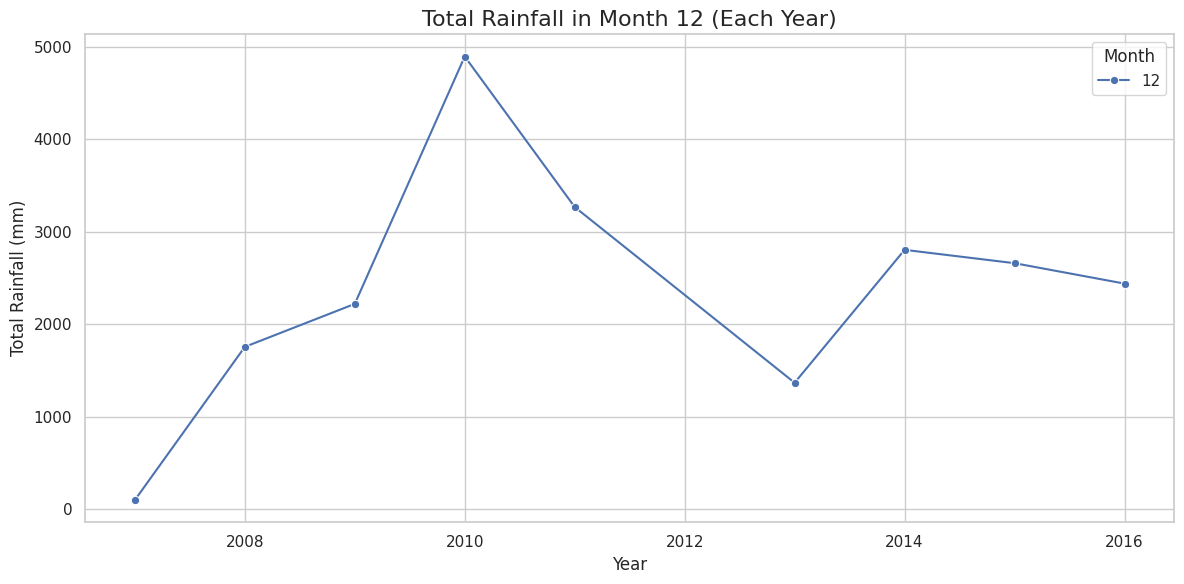

In [30]:
def total_rains_by_month_line(df, month):
    df_month = df[df['Date'].dt.month == month]

    # Group by year and calculate the total rainfall for each December
    total_rain_month = df_month.groupby(df_month['Date'].dt.year)['Rainfall'].sum().reset_index()

    # Create a line plot of the total rainfall for each December
    sns.lineplot(x='Date', y='Rainfall', data=total_rain_month, marker='o', label=f'{month}')

    # Customize the plot
    plt.title(f'Total Rainfall in Month {month} (Each Year)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.legend(title='Month')
    # Show the plot
    plt.tight_layout()


for i in range(1, 13):
    plt.figure(figsize=(12, 6))
    total_rains_by_month_line(rains, i)
    plt.show()

In [31]:
city_coords = {
    'Albury': (-36.0785, 146.9136),
    'BadgerysCreek': (-33.8813, 150.7282),
    'Cobar': (-31.8667, 145.7667),
    'CoffsHarbour': (-30.3026, 153.1137),
    'Moree': (-29.4706, 149.8392),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2202, 151.5433),
    'NorfolkIsland': (-29.0408, 167.9541),
    'Penrith': (-33.7675, 150.6931),
    'Richmond': (-33.5982, 150.7581),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.0433, 147.3587),
    'Williamtown': (-32.7951, 151.8118),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4167, 149.1000),
    'MountGinini': (-35.4471, 148.9685),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7582, 144.2814),
    'Sale': (-38.1100, 147.0737),
    'MelbourneAirport': (-37.6692, 144.8411),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1850, 142.1625),
    'Nhil': (-35.2060, 141.6450),
    'Portland': (-38.3516, 141.5878),
    'Watsonia': (-37.7139, 145.0875),
    'Dartmoor': (-37.7251, 141.2843),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9203, 145.7710),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2589, 146.8183),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8321, 140.7807),
    'Nuriootpa': (-34.4973, 138.9966),
    'Woomera': (-31.1395, 136.7984),
    'Albany': (-35.0285, 117.8837),
    'Witchcliffe': (-33.7015, 115.0911),
    'PearceRAAF': (-31.9131, 115.9741),
    'PerthAirport': (-31.9402, 115.9676),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-33.3937, 121.2060),
    'Walpole': (-34.9639, 115.8106),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4391, 147.1349),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4686, 132.2678),
    'Uluru': (-25.3444, 131.0369)
}

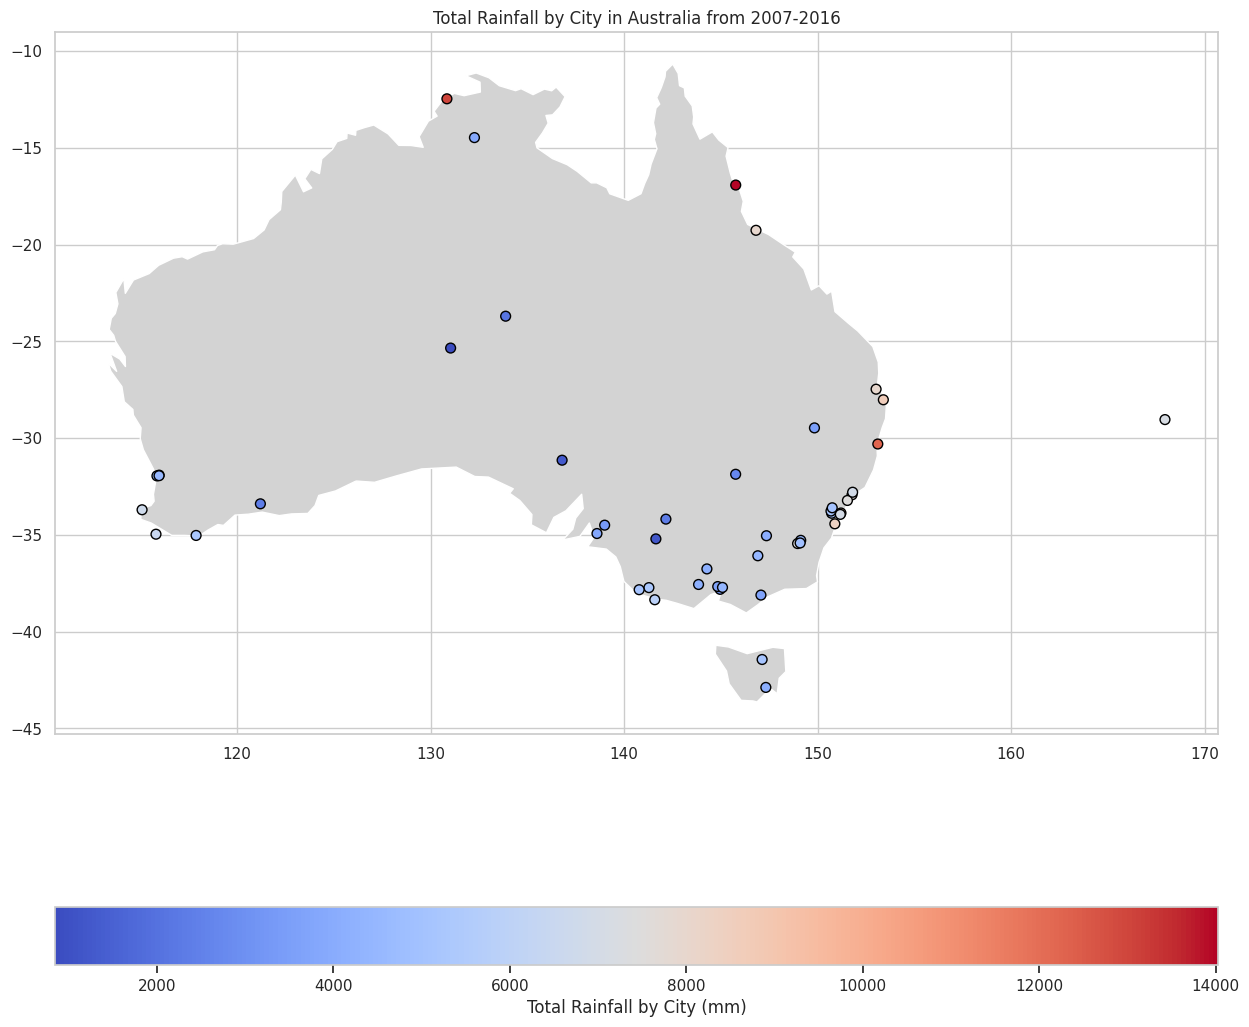

In [32]:
# Load the dataset
data = rains

# Drop rows with missing 'Rainfall' and 'Location' values
data_clean = data.dropna(subset=['Rainfall'])

# Group by city (Location) and get total rainfall for each city
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Get unique city locations (we assume that each city is a point)
# For simplicity, let's use a hypothetical dataset for city coordinates
# For real-world use, you'd replace this with actual coordinates or a geospatial file

# Hypothetical city coordinates (latitude, longitude)
# Coordinates for the cities (replace with actual coordinates or use a geocoding API)


# Create GeoDataFrame with city coordinates and rainfall data
rainfall_by_city['Coordinates'] = rainfall_by_city['Location'].map(city_coords)
rainfall_by_city['geometry'] = rainfall_by_city['Coordinates'].apply(lambda x: Point(x[1], x[0]))
gdf = gpd.GeoDataFrame(rainfall_by_city, geometry='geometry')

# Load a map of Australia
world = gpd.read_file('../data/110m_cultural/ne_110m_admin_0_countries.shp')
australia = world[world['NAME'] == "Australia"]

# Plot the rainfall by city on a map
fig, ax = plt.subplots(figsize=(15, 15))
australia.plot(ax=ax, color='lightgrey')

# Plot cities as points on the map, color-coded by total rainfall
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
         edgecolor='black',  # Set marker edges to black for contrast
         linewidth=1  # Increase edge width for "bold" appearance)
         )
# Set title and show plot
plt.title('Total Rainfall by City in Australia from 2007-2016')
plt.show()


<Axes: >

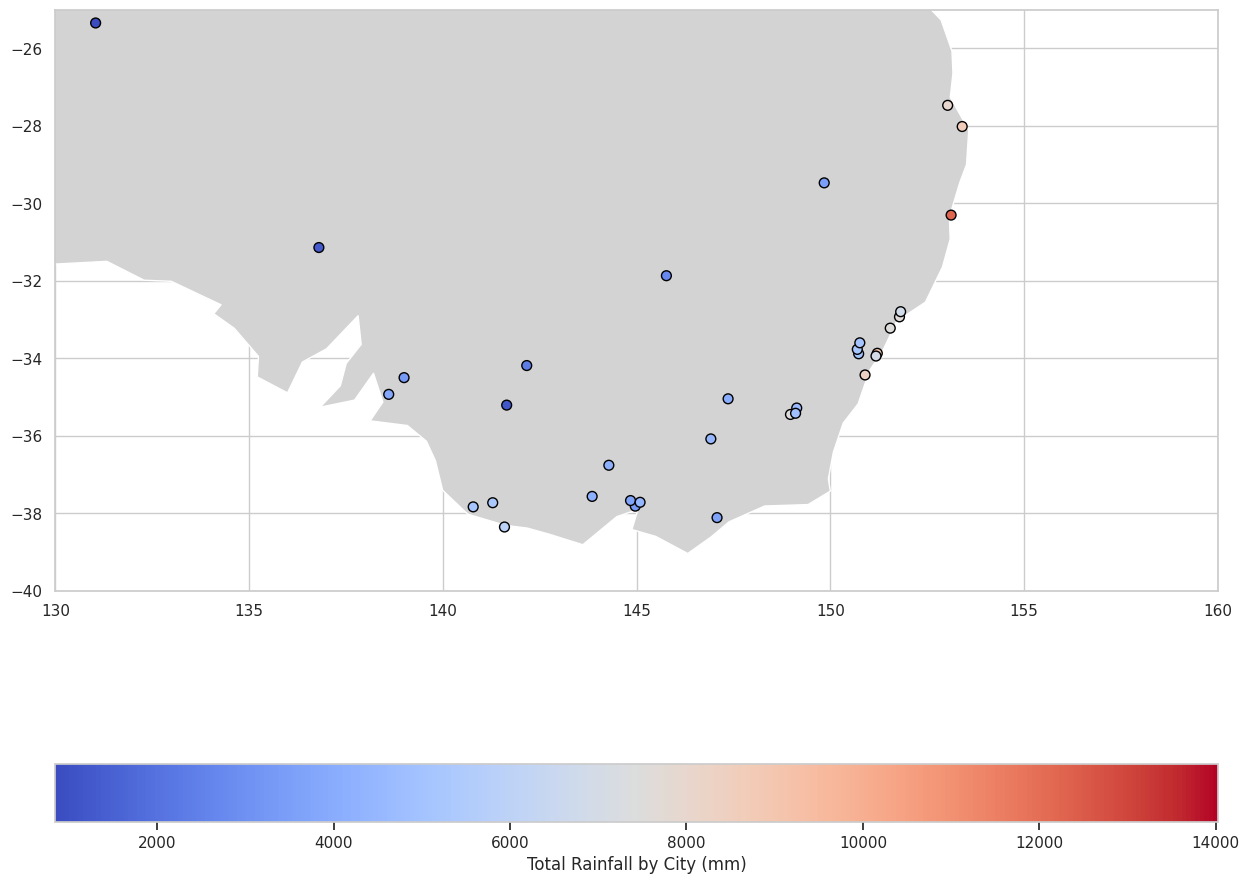

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(130, 160)
ax.set_ylim(-40, -25)
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
         edgecolor='black',
         linewidth=1)

In [ ]:
sns.color_palette("coolwarm")

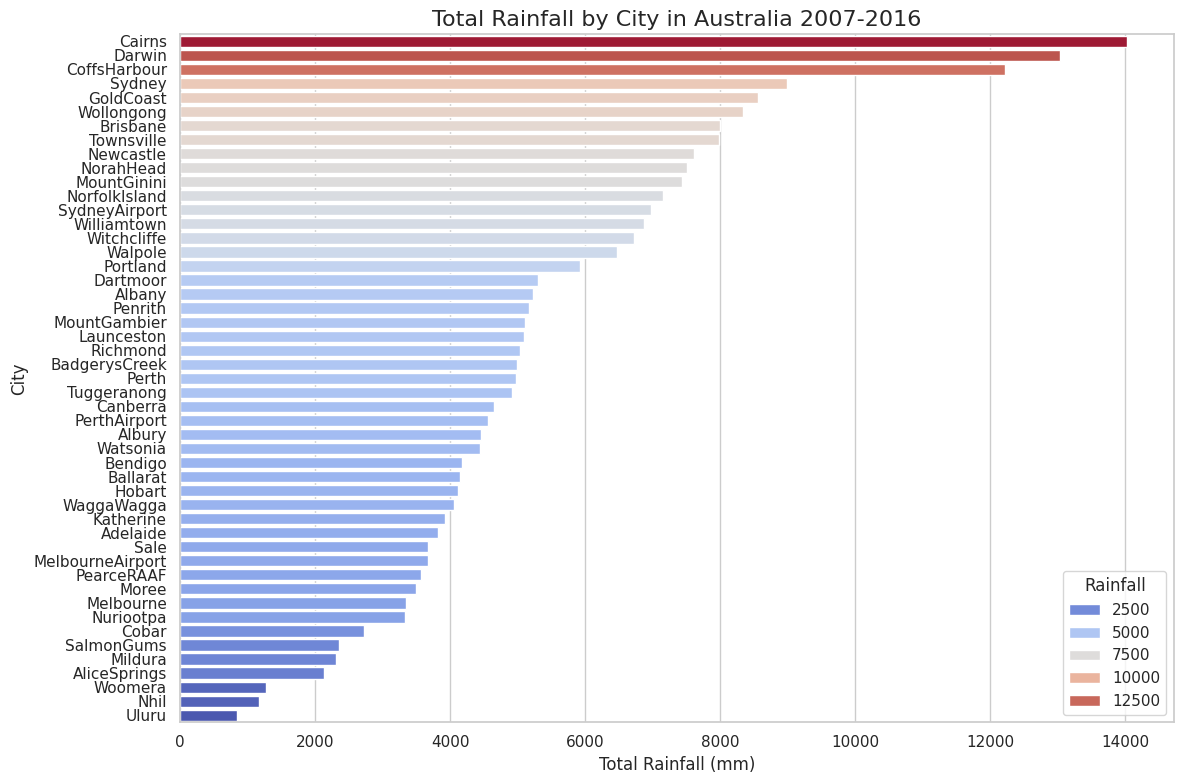

In [34]:
data_clean = rains.dropna(subset=['Rainfall'])

# Group by city (Location) and sum rainfall
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Sort by total rainfall for better visualization
rainfall_by_city = rainfall_by_city.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall',
    y='Location',
    data=rainfall_by_city,
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Total Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

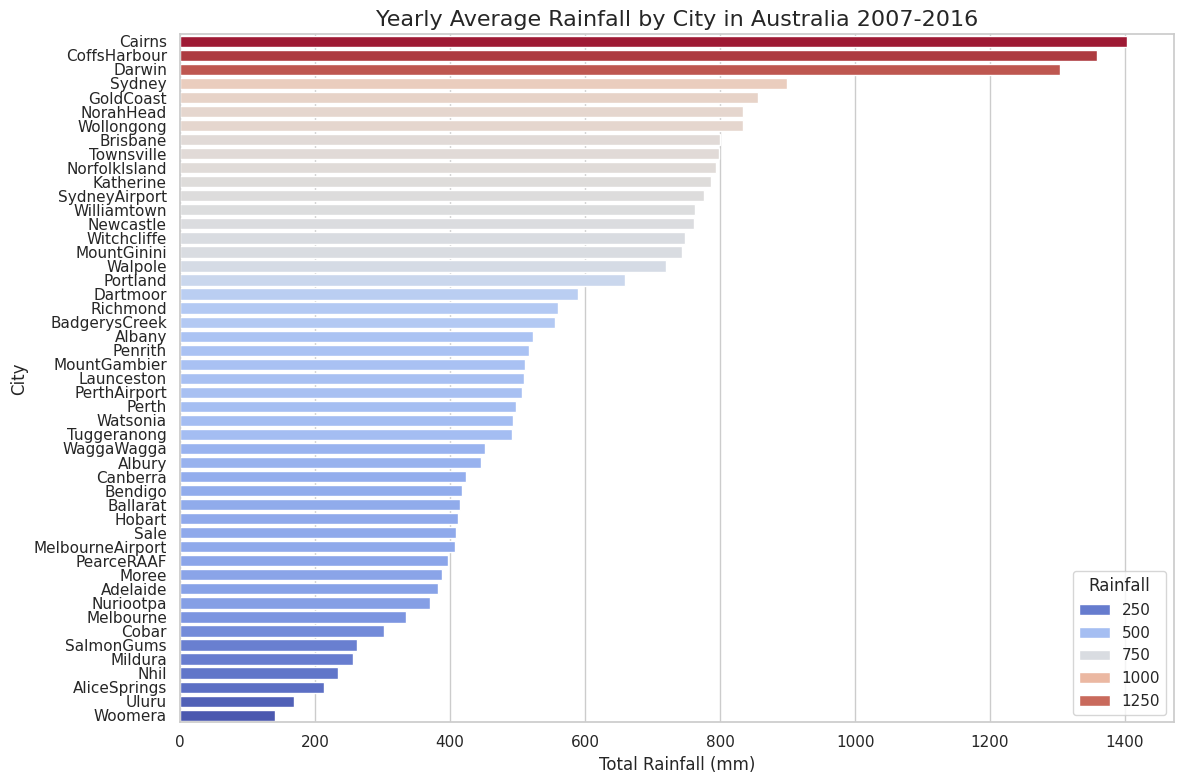

In [35]:
data_clean['year'] = data_clean['Date'].dt.year
group_by_loc_year = data_clean.groupby(['Location', 'year'])['Rainfall'].sum().groupby('Location').mean().reset_index()

rainfall_by_city = group_by_loc_year.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall',
    y='Location',
    data=rainfall_by_city,
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Yearly Average Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
nulls_by_row = rains.isnull().sum(axis=1)
nulls_by_row.describe()

count    113754.000000
mean          2.230058
std           2.467382
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          20.000000
dtype: float64

In [ ]:
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Year').apply(lambda x: x.isnull().sum(), include_groups=False), cmap=cmap)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Month').apply(lambda x: x.isnull().sum(), include_groups=False), cmap=cmap)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Location').apply(lambda x: x.isnull().sum(), include_groups=False), cmap=cmap)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

def is_null(value):
    if isinstance(value, str):
        return value == None
    if isinstance(value, pd.core.series.Series) or isinstance(value, np.ndarray):
        return len(value) == 0
    else:
        return np.isnan(value)

def impute_row_hierarchicaly(
        row,
        features,
        grouped_2_levels,
        grouped_1_level,
        global_values,
        l1_group_key = "Location",
        l2_group_key = "Month"
):
    for c in features:
        imputation_value = grouped_2_levels.loc[(row[l1_group_key], row[l2_group_key])][c]
        if is_null(imputation_value):
            imputation_value = grouped_1_level.loc[row[l1_group_key]][c]
        if is_null(imputation_value):
            imputation_value = global_values[c]
        row[c] = imputation_value
    return row


class HierarchicalImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.global_mean = None
        self.mean_by_location = None
        self.mean_by_location_month = None

        self.global_top = None
        self.top_by_location = None
        self.top_by_location_month = None

        self.mean_adjusted = ["Rainfall", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "MinTemp", "MaxTemp"]
        self.top_adjusted = ["WindGustDir", "WindDir9am", "WindDir3pm"]



    def fit(self, X, y = None):
        group_l1_l2 = lambda features: X[["Location", "Month"] + features].groupby(["Location", "Month"])
        group_l1 = lambda features: X[["Location"] + features].groupby(["Location"])

        self.mean_by_location_month = group_l1_l2(self.mean_adjusted).mean()
        self.mean_by_location = group_l1(self.mean_adjusted).mean()
        self.global_mean = X[self.mean_adjusted].mean()

        def mode(x):
            m = x.mode()
            if isinstance(x, pd.core.series.Series) or isinstance(x, np.ndarray):
                if len(m) == 0:
                    return np.nan
                else:
                    return m[0]
            else:
                return m
        self.top_by_location_month = group_l1_l2(self.top_adjusted).agg(mode)
        self.top_by_location = group_l1(self.top_adjusted).agg(mode)
        self.global_top = X[self.top_adjusted].agg(mode)
        return self

    def transform(self, X):
        X_copy = X.copy()
        mean_imputer = lambda row: impute_row_hierarchicaly(row, self.mean_adjusted,  self.mean_by_location_month, self.mean_by_location, self.global_mean, l1_group_key = "Location", l2_group_key = "Month")
        top_imputer = lambda row: impute_row_hierarchicaly(row, self.top_adjusted, self.top_by_location_month, self.top_by_location, self.global_top, l1_group_key = "Location", l2_group_key = "Month")
        imputer = lambda row: top_imputer(mean_imputer(row))
        return X_copy.apply(imputer, axis=1)


# Imputacion y escalamiento

In [41]:
imputer = HierarchicalImputer()
imputer.fit(rains)


HierarchicalImputer()

In [42]:
rains_imp = imputer.transform(rains)

In [43]:
rains_imp["RainTodayNull"] = rains_imp["RainToday"].isnull().astype(np.int64)
rains_imp["RainToday"] = rains_imp["RainToday"].fillna(0)

In [44]:
rains_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 103642 to 122308
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 113754 non-null  datetime64[ns]
 1   Location             113754 non-null  object        
 2   MinTemp              113754 non-null  float64       
 3   MaxTemp              113754 non-null  float64       
 4   Rainfall             113754 non-null  float64       
 5   Evaporation          113754 non-null  float64       
 6   Sunshine             113754 non-null  float64       
 7   WindGustDir          113754 non-null  object        
 8   WindGustSpeed        113754 non-null  float64       
 9   WindDir9am           113754 non-null  object        
 10  WindDir3pm           113754 non-null  object        
 11  WindSpeed9am         113754 non-null  float64       
 12  WindSpeed3pm         113754 non-null  float64       
 13  Humidity9am   

In [45]:
coordinates = pd.read_csv("../data/worldcities.csv")
coordinates["Location"] = coordinates["city"]
coordinates.drop(columns=["city"], inplace = True)
coordinates = coordinates[coordinates["country"] == "Australia"]

In [46]:
rains_imp = rains_imp.merge(coordinates[["Location", "lat", "lng"]], right_on="Location", left_on="Location", how="left")

In [47]:

#Fill missing latitudes using city_coords
rains_imp.loc[rains_imp["lat"].isnull(), "lat"] = rains_imp.loc[
    rains_imp["lat"].isnull(), "Location"
].apply(lambda loc: city_coords[loc][0] if loc in city_coords else None).astype(np.float64)

# Fill missing longitudes using city_coords
rains_imp.loc[rains_imp["lng"].isnull(), "lng"] = rains_imp.loc[
    rains_imp["lng"].isnull(), "Location"
].apply(lambda loc: city_coords[loc][1] if loc in city_coords else None).astype(np.float64)

In [48]:
# List of compass directions
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Map directions to degrees
direction_to_degrees = {direction: i * 22.5 for i, direction in enumerate(directions)}


In [49]:
rains_imp["WindGustDirDeg"] = rains_imp.loc[:, "WindGustDir"].apply(lambda direc: direction_to_degrees[direc])
rains_imp["WindDir9amDeg"] = rains_imp.loc[:, "WindDir9am"].apply(lambda direc: direction_to_degrees[direc])
rains_imp["WindDir3pmDeg"] = rains_imp.loc[:, "WindDir3pm"].apply(lambda direc: direction_to_degrees[direc])


In [50]:
rains_imp.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)
rains_imp["RainTomorrow"] = rains_imp["RainTomorrow"].apply(lambda rain: 1 if rain == "Yes" else 0)
rains_imp["RainToday"] = rains_imp["RainToday"].apply(lambda rain: 1 if rain == "Yes" else 0)

In [51]:
rains_x.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  Month  
0       1007.1       8.0       NaN     16.9     21.8         No  2008     12  
1       1007.8       NaN       NaN     17.2     24.3         No  2008     12  
2       1008.7       NaN       2.0     21.0     23.2         No  2008     12  
3       1012.8       NaN       NaN     18.1     26.5         No  2008     12  
4       1006.0       7.0       8.0     17.8     29.7         No  2008     12  

[5 rows x 24 columns]

In [52]:
from sklearn.preprocessing import MinMaxScaler
rains_x = rains_imp.drop(columns=["RainTomorrow", "Date","Location"])
rains_y = rains_imp["RainTomorrow"]

rains_x_scaled = MinMaxScaler().fit_transform(rains_x)
rains_x = pd.DataFrame(rains_x_scaled, columns = rains_x.columns)

rains_scaled = rains_x.copy()
rains_scaled["RainTomorrow"] = rains_y

In [53]:
sampled = rains_scaled.sample(frac=0.1)
s_x = sampled.drop(columns=["RainTomorrow"])
s_y = sampled["RainTomorrow"]

In [54]:
rains_scaled

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.608188  0.771985  0.023949     0.508576  0.889631       0.689407   
1       0.463531  0.449891  0.123988     0.260262  0.489969       0.531600   
2       0.608250  0.661563  0.041289     0.420773  0.660703       0.474625   
3       0.973075  0.881881  0.587775     0.293578  0.489969       0.580432   
4       0.778571  0.720378  0.199764     0.367198  0.703856       0.227392   
...          ...       ...       ...          ...       ...            ...   
116108  0.581331  0.747304  0.062673     0.457031  0.812485       0.611650   
116109  0.825449  0.858130  0.081157     0.507080  0.645369       0.556761   
116110  0.476089  0.432793  0.182862     0.260262  0.489969       0.835115   
116111  0.574585  0.698921  0.054445     0.394672  0.891725       0.809020   
116112  0.595688  0.656562  0.055422     0.215970  0.508150       0.198926   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Year  \
0           0.587762      0.481884     0.374938     0.247108  ...   0.5   
1           0.443681      0.553099     0.590424     0.653540  ...   0.3   
2           0.341754      0.416705     0.373668     0.332689  ...   0.9   
3           0.406049      0.329561     0.756731     0.730466  ...   0.8   
4           0.160975      0.264295     0.488381     0.609940  ...   0.5   
...              ...           ...          ...          ...  ...   ...   
116108      0.606339      0.484410     0.379281     0.204712  ...   0.5   
116109      0.590212      0.348358     0.370121     0.249694  ...   0.7   
116110      0.628191      0.688271     0.492590     0.604383  ...   0.3   
116111      0.787362      0.784833     0.329966     0.374101  ...   0.8   
116112      0.235383      0.251226     0.559676     0.484324  ...   0.6   

           Month  ConsecutiveRainDays  RainTodayNull       lat       lng  \
0       0.000000                0.000            0.0  0.275381  0.452216   
1       0.636364                0.000            0.0  0.317333  0.689560   
2       0.909091                0.000            0.0  0.261250  0.444714   
3       0.000000                0.000            0.0  0.933363  0.324908   
4       0.909091                0.000            0.0  0.506292  0.717648   
...          ...                  ...            ...       ...       ...   
116108  0.909091                0.000            0.0  0.285512  0.512025   
116109  0.090909                0.000            0.0  0.361794  0.580285   
116110  0.636364                0.125            0.0  0.277490  0.677071   
116111  0.909091                0.000            0.0  0.359379  0.016581   
116112  0.272727                0.000            0.0  0.358863  0.014556   

        WindGustDirDeg  WindDir9amDeg  WindDir3pmDeg  RainTomorrow  
0             0.400000       0.333333       0.733333             0  
1             0.866667       0.866667       0.533333             0  
2             0.666667       0.666667       0.666667             0  
3             0.933333       0.933333       0.933333             1  
4             0.133333       0.200000       0.133333             0  
...                ...            ...            ...           ...  
116108        0.466667       0.400000       0.733333             0  
116109        0.266667       0.266667       0.600000             0  
116110        0.800000       0.666667       0.133333             1  
116111        0.266667       0.266667       0.666667             0  
116112        0.666667       0.266667       0.666667             0  

[116113 rows x 27 columns]

In [55]:
rains_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116113 entries, 0 to 116112
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MinTemp              116113 non-null  float64
 1   MaxTemp              116113 non-null  float64
 2   Rainfall             116113 non-null  float64
 3   Evaporation          116113 non-null  float64
 4   Sunshine             116113 non-null  float64
 5   WindGustSpeed        116113 non-null  float64
 6   WindSpeed9am         116113 non-null  float64
 7   WindSpeed3pm         116113 non-null  float64
 8   Humidity9am          116113 non-null  float64
 9   Humidity3pm          116113 non-null  float64
 10  Pressure9am          116113 non-null  float64
 11  Pressure3pm          116113 non-null  float64
 12  Cloud9am             116113 non-null  float64
 13  Cloud3pm             116113 non-null  float64
 14  Temp9am              116113 non-null  float64
 15  Temp3pm          

In [56]:
from sklearn.manifold import TSNE


rains_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10, n_jobs=8).fit_transform(s_x)

<Axes: >

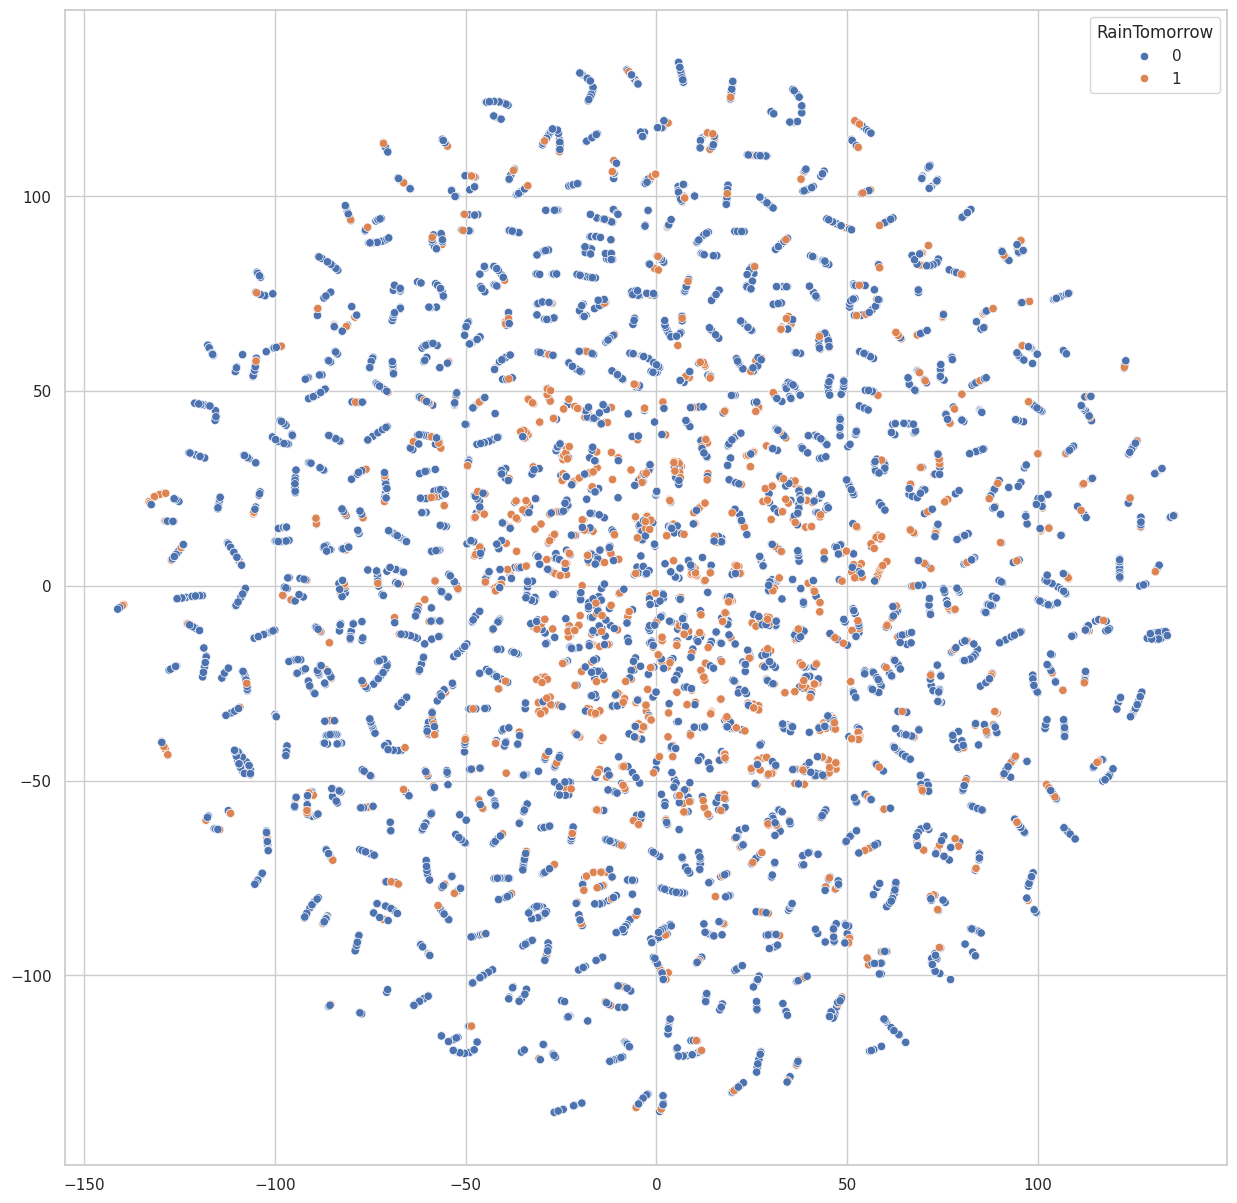

In [57]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=rains_embedded.T[0],y=rains_embedded.T[1], hue=s_y)

In [58]:
embedds = []
for i in [5, 10, 20, 30, 40, 50, 60]:
    embedds.append(TSNE(n_components=2, learning_rate='auto',init='random', perplexity=i).fit_transform(s_x))


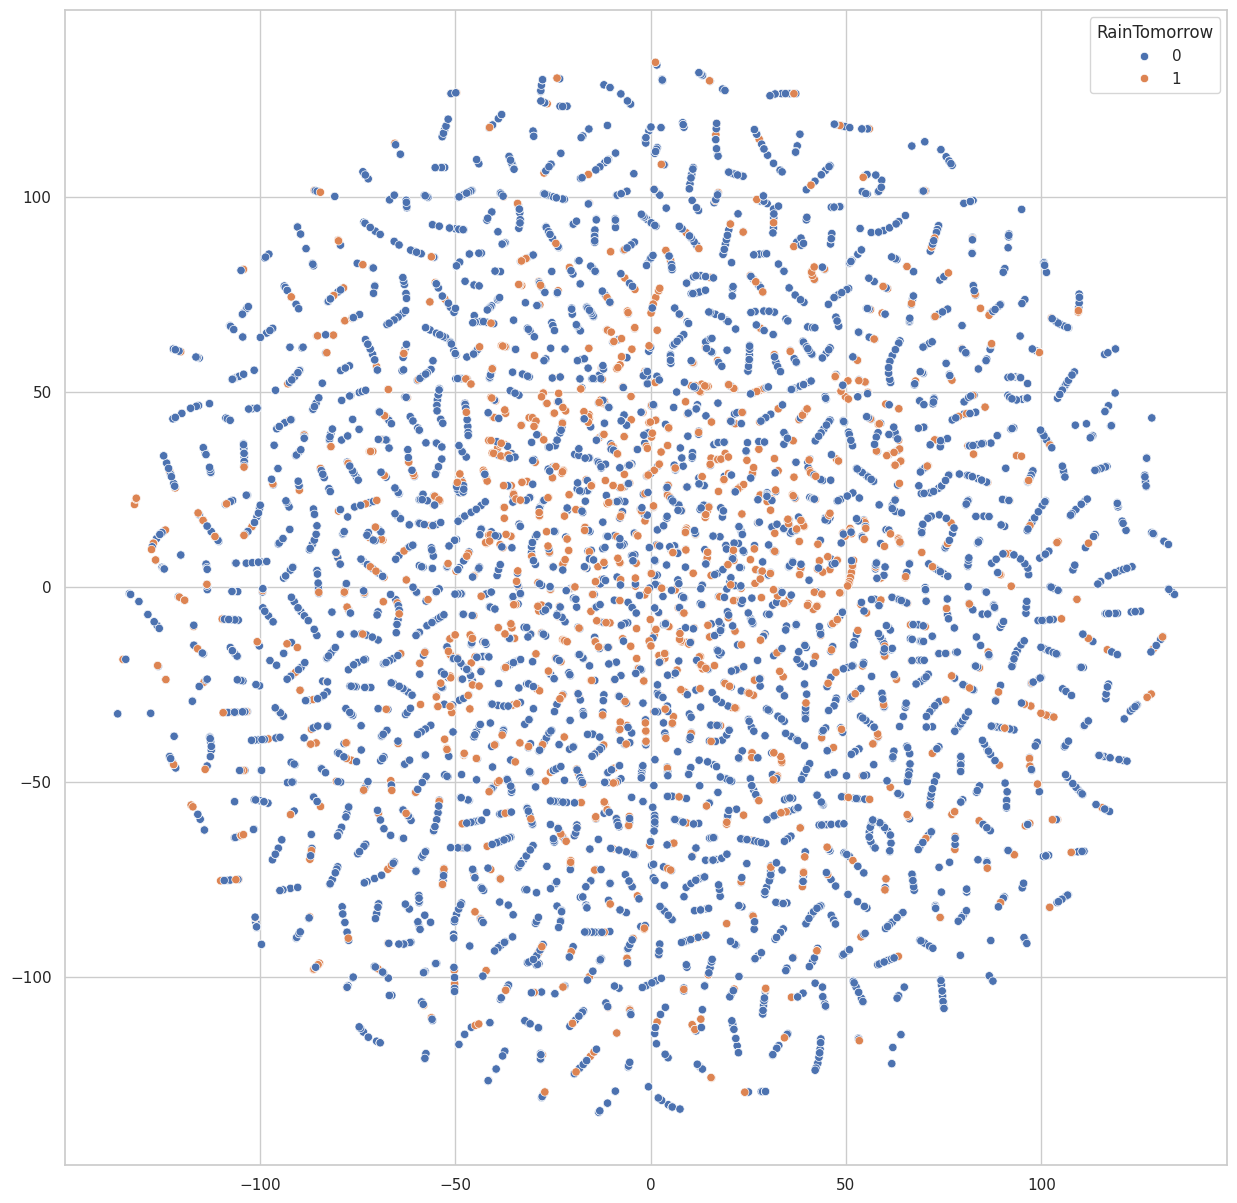

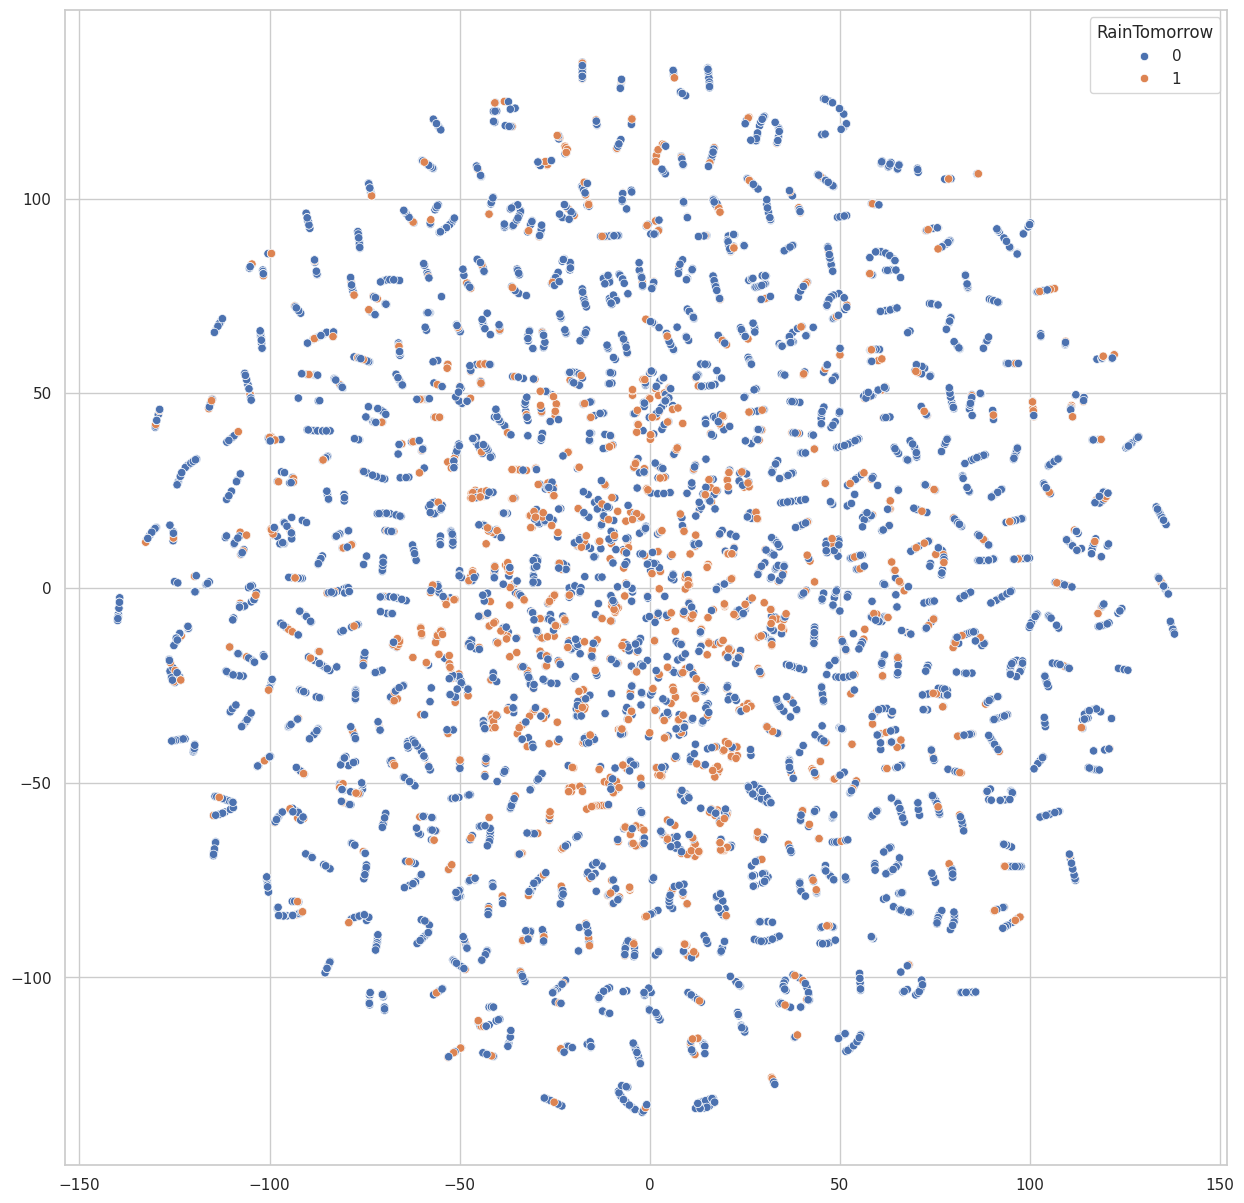

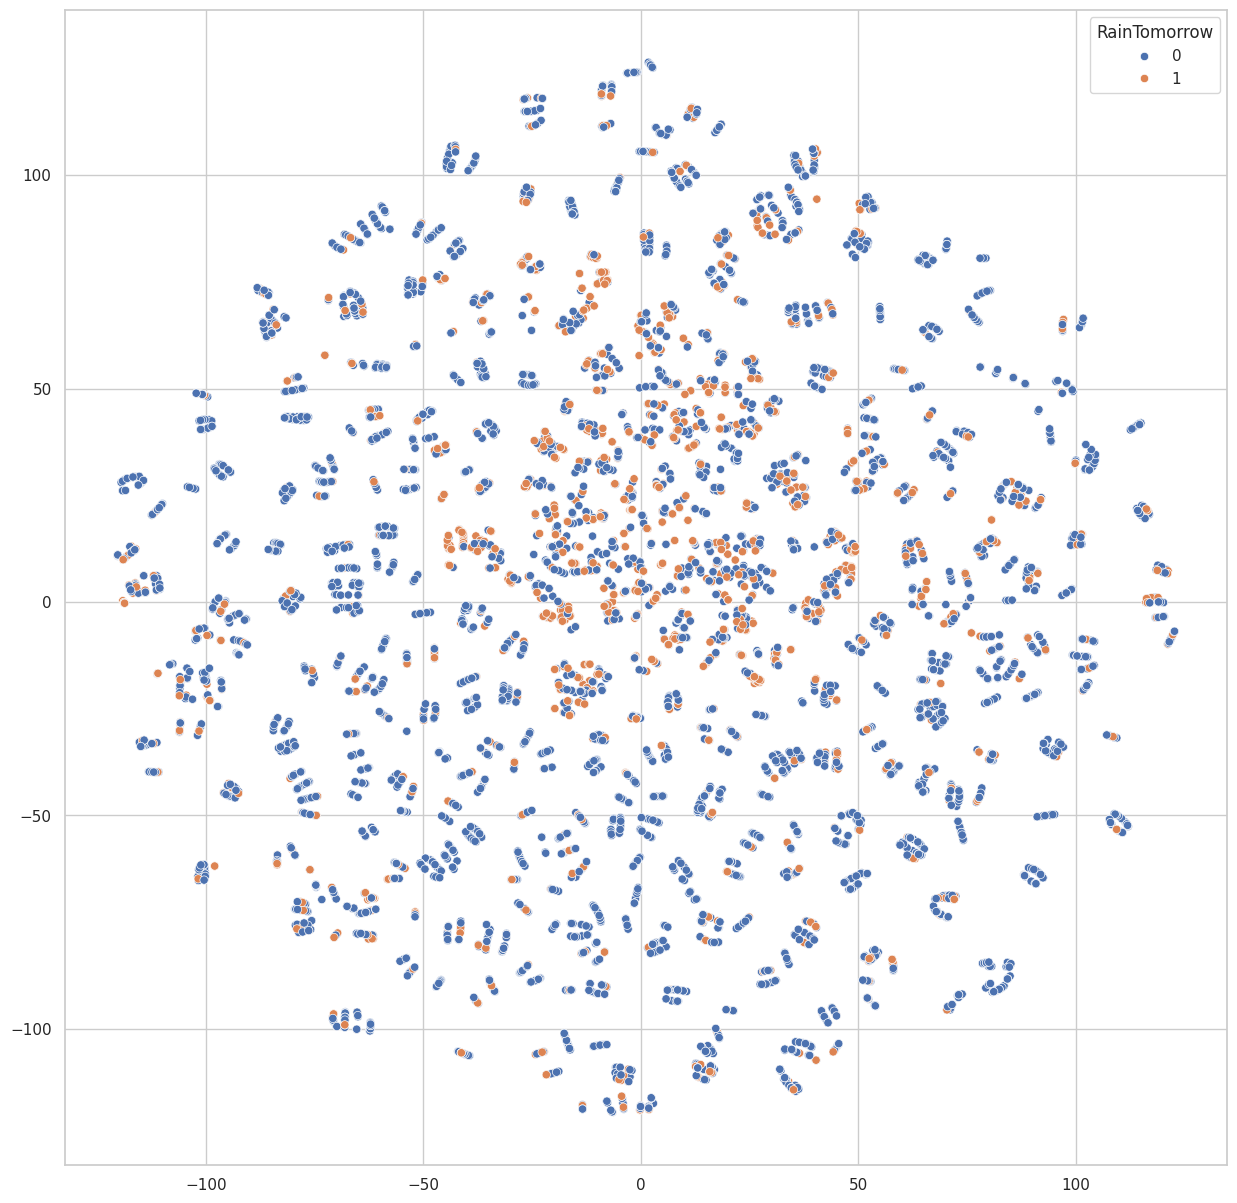

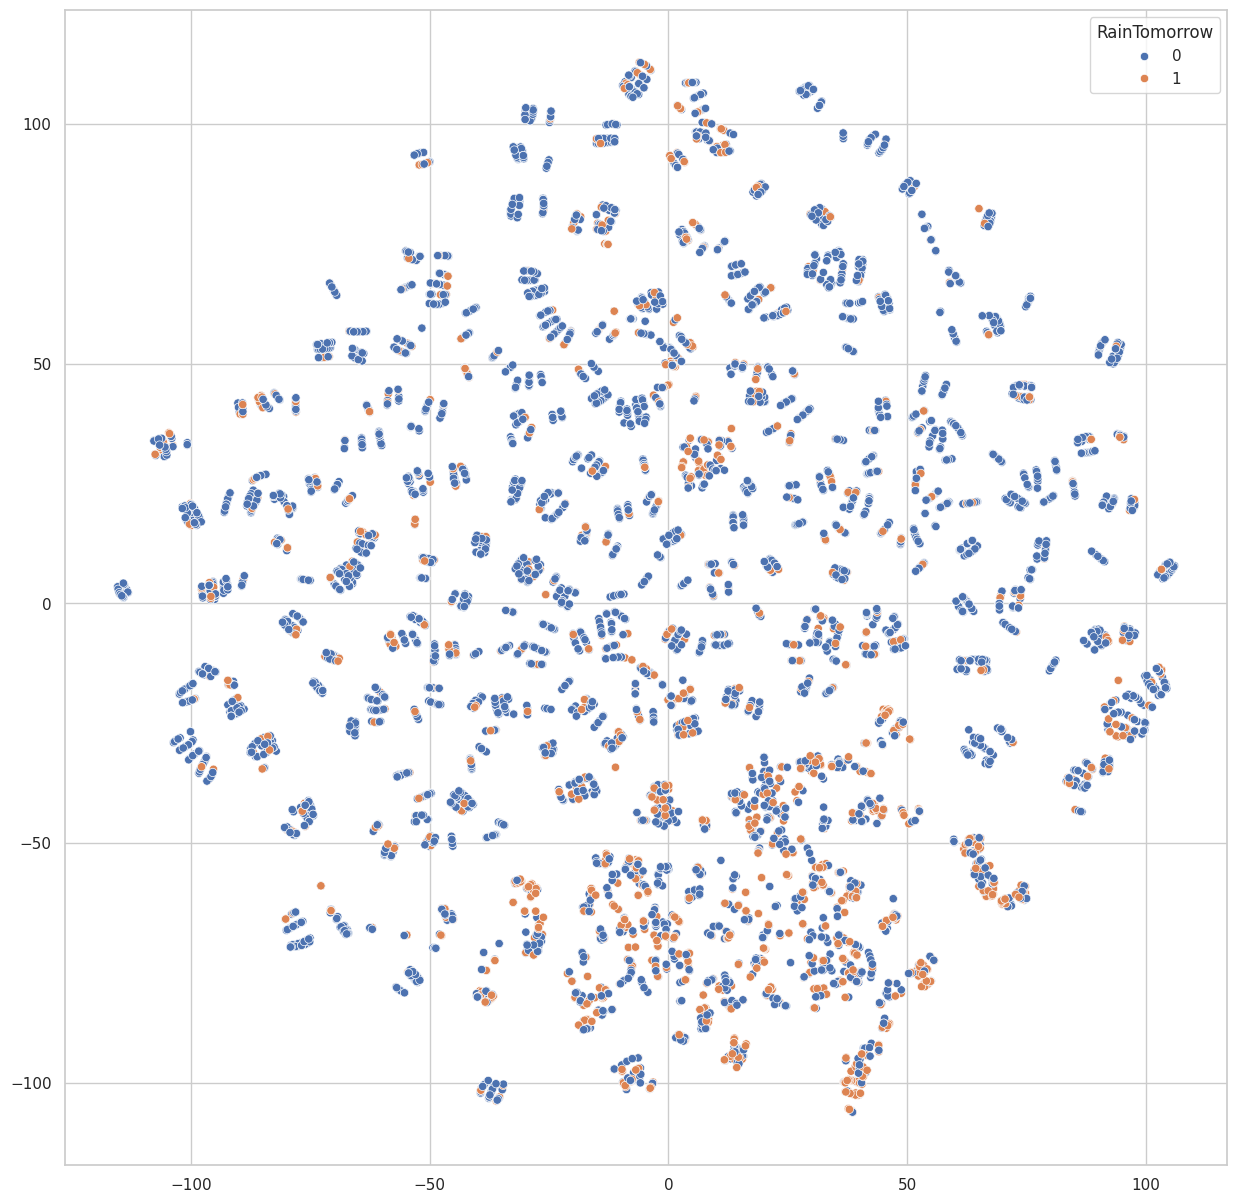

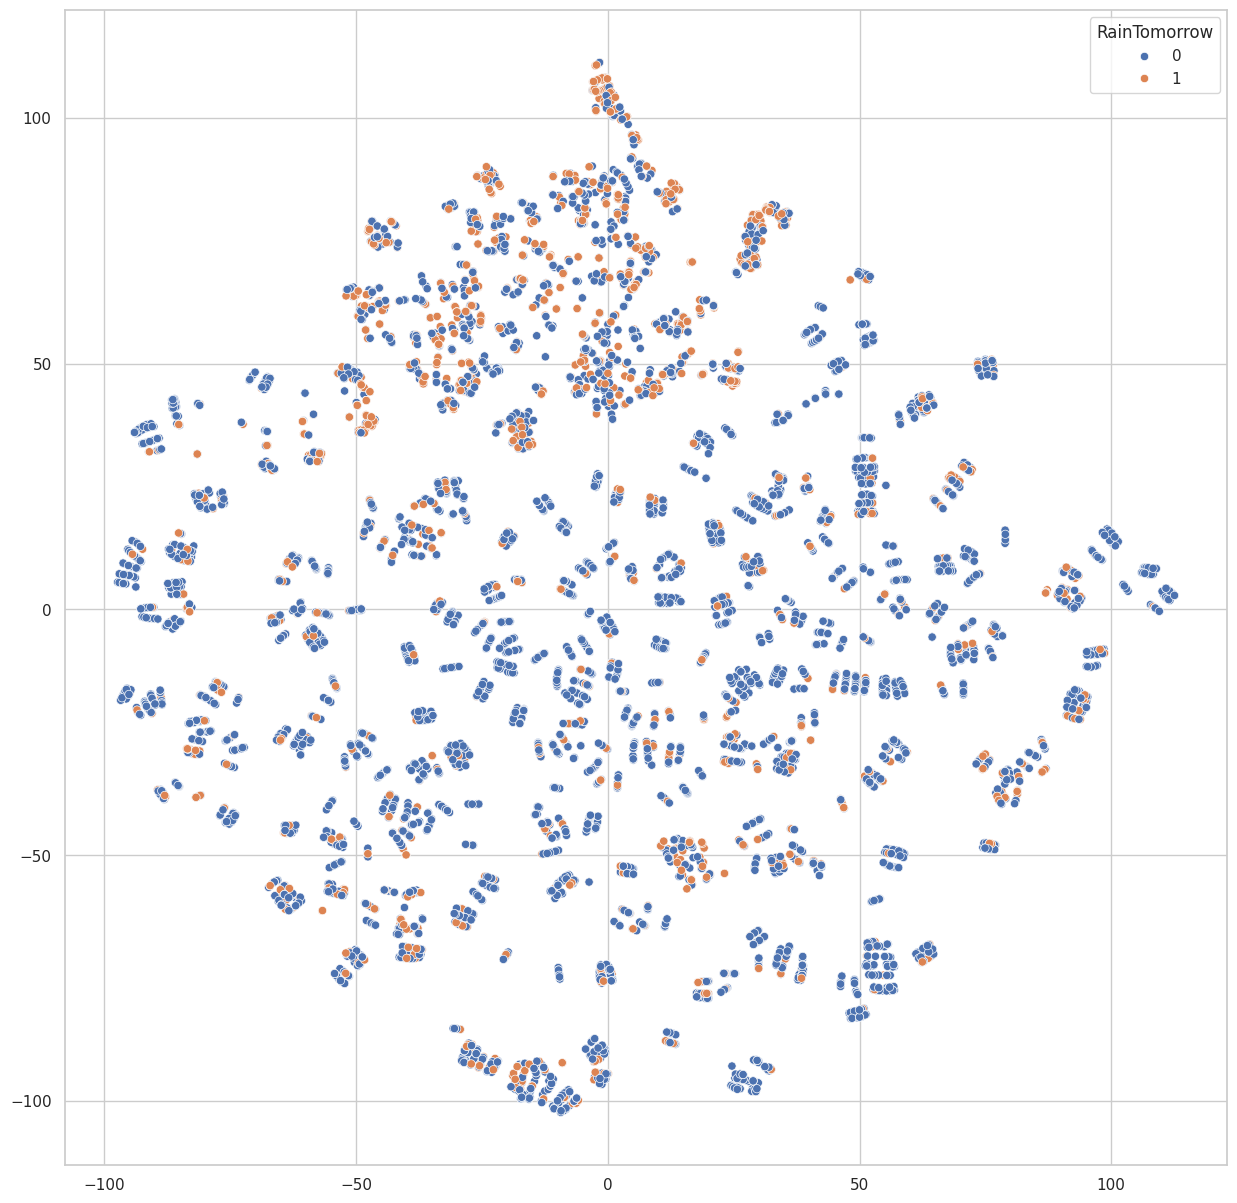

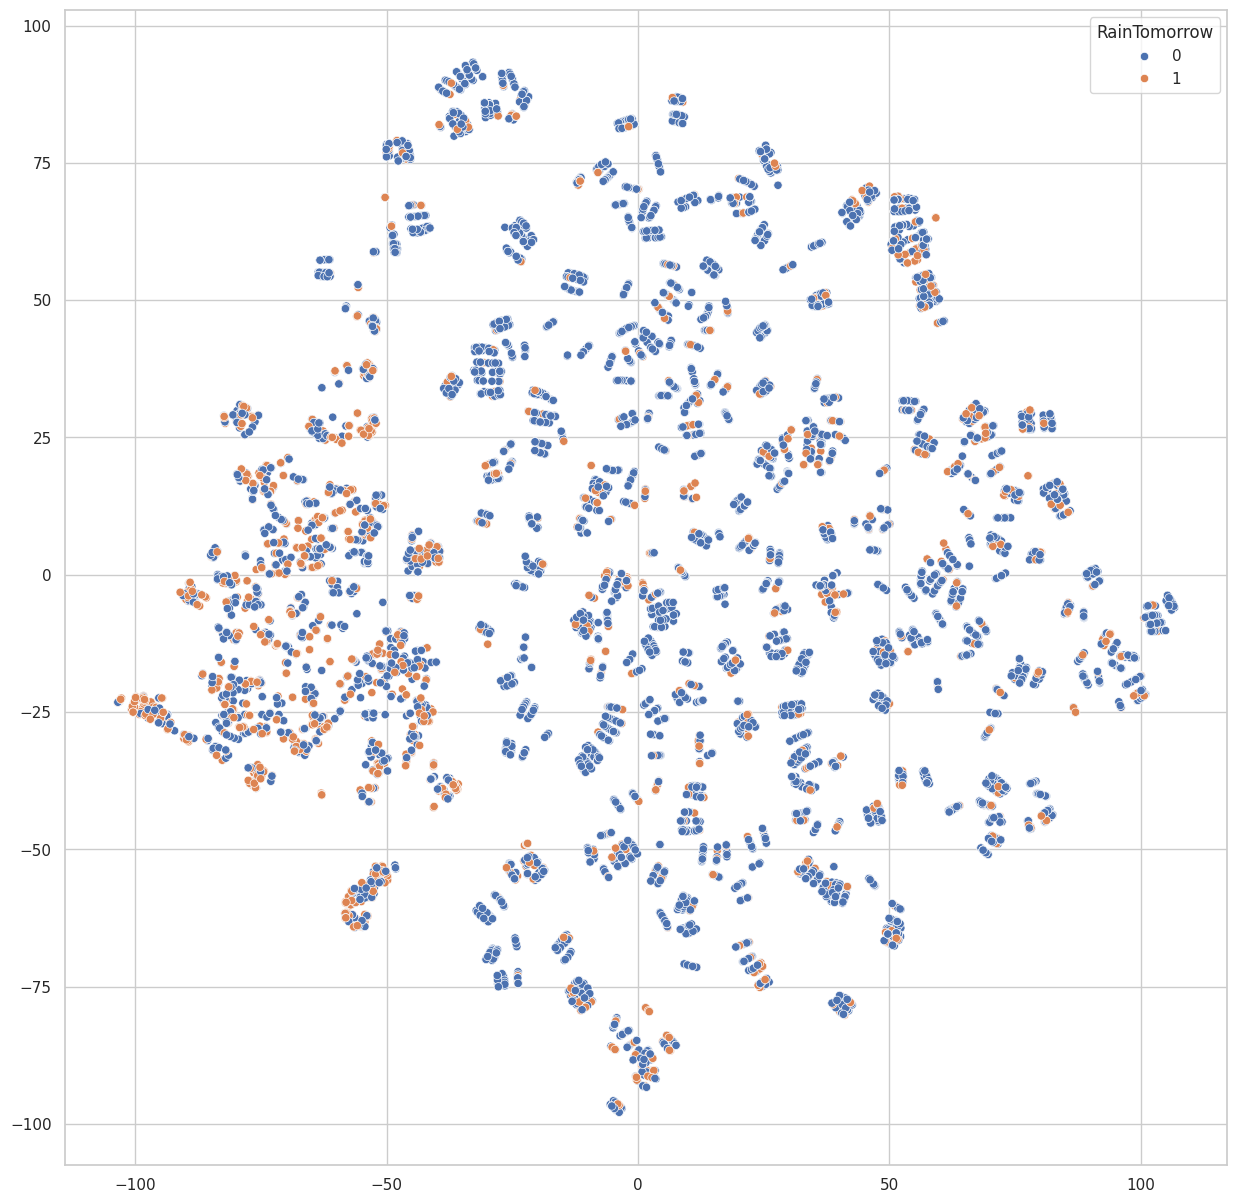

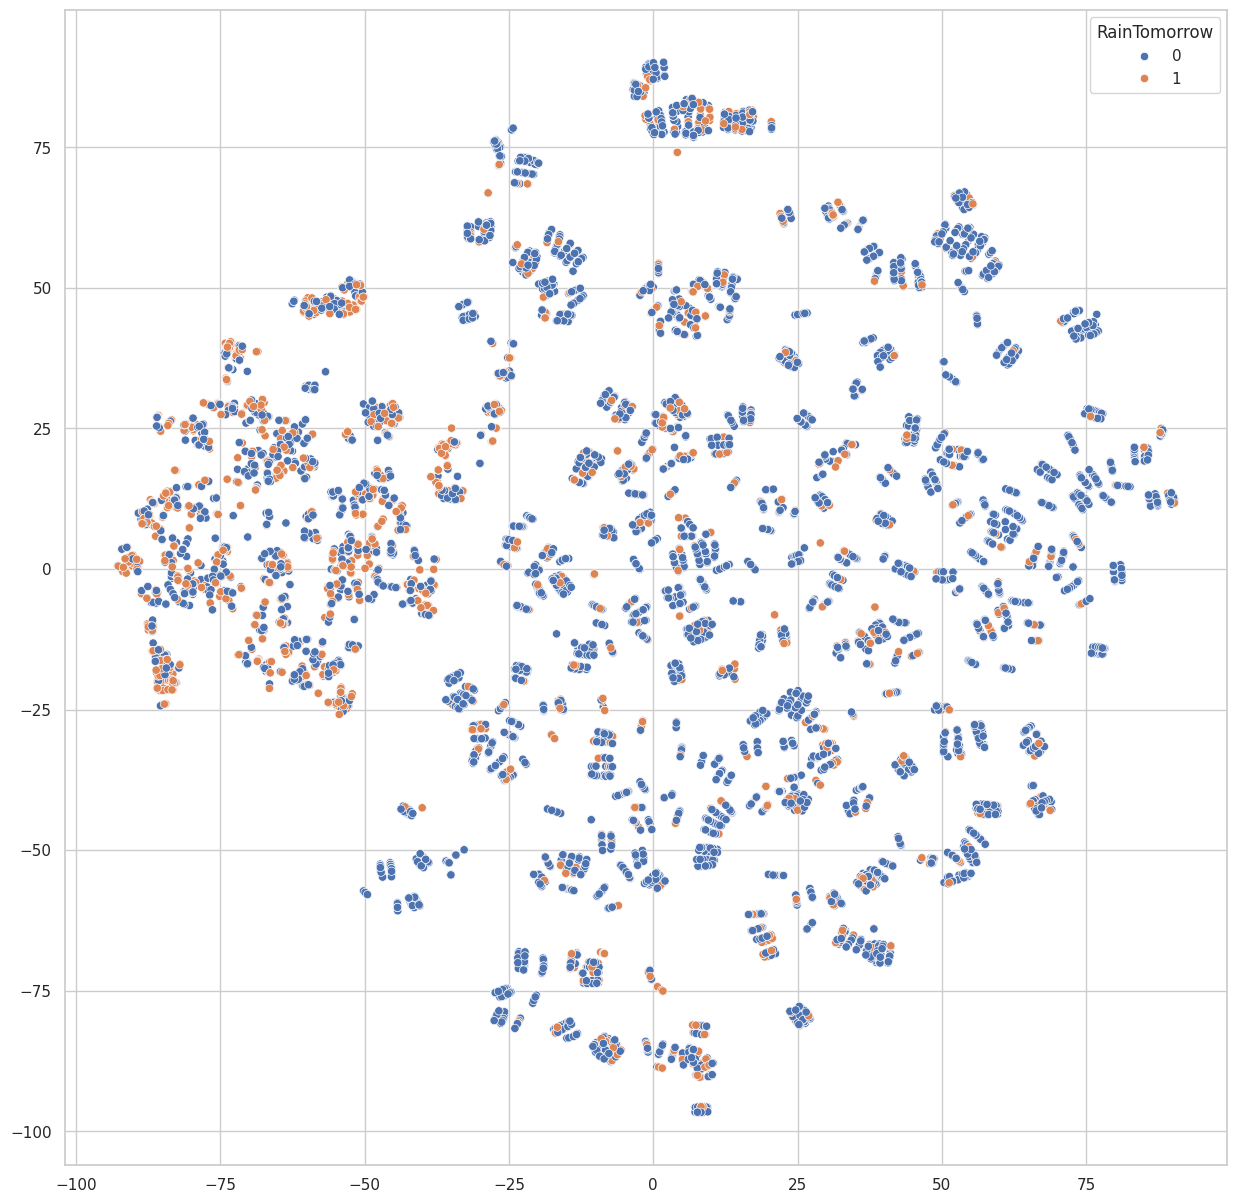

In [59]:
for em in embedds:
    plt.figure(figsize=(15,15))
    sns.scatterplot(x=em.T[0],y=em.T[1], hue=s_y)

<Axes: >

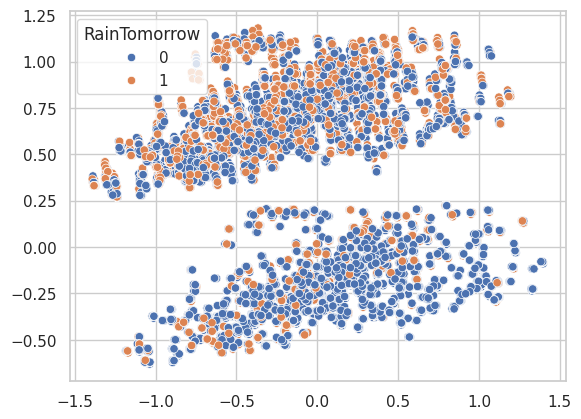

In [60]:
from sklearn.decomposition import PCA
pca_emb = PCA(n_components=2).fit_transform(rains_x)
sns.scatterplot(x=pca_emb.T[0], y=pca_emb.T[1], hue = rains_y)

# Feature engineering 

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

def eval_pipeline(pipe, X_train, y_train):

    df = X_train.copy()
    df["RainTomorrow"] = y_train
    df = df.sample(frac=0.1)
    
    X_train_01 = df.drop(columns=["RainTomorrow"])
    y_train_01 = np.where(df["RainTomorrow"] == "Yes", 1, 0)
    
    pipe.fit(X_train_01, y_train_01)

    y_pred = pipe.predict(X_train_01)
    
    # Evaluate the model
    print("Accuracy:", accuracy_score(y_train_01, y_pred))
    print("\nClassification Report:\n", classification_report(y_train_01, y_pred))
    print("\Roc auc Report:\n", roc_auc_score(y_train_01, y_pred))
    
    roc_auc_score(
        y_train_01,
        y_pred
    )

In [62]:
class ShapeDebugger(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print(X.shape)
        return X

class ColumnDebugger(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print(X.columns)
        return X


In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


class RainTodayTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["RainTodayNull"] = X["RainToday"].isnull().astype(np.int64)
        X["RainToday"] = X["RainToday"].apply(lambda rain: 1 if rain == "Yes" else 0)
        return X

# Custom transformer for merging location data and filling coordinates
class CoordinateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, coordinates, city_coords):
        self.coordinates = coordinates
        self.city_coords = city_coords

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Merge coordinates
        merged = X.merge(self.coordinates[["Location", "lat", "lng"]], right_on="Location", left_on="Location", how="left")
        # Fill missing latitude and longitude
        merged.loc[merged["lat"].isnull(), "lat"] = merged.loc[
            merged["lat"].isnull(), "Location"
        ].apply(lambda loc: self.city_coords[loc][0] if loc in self.city_coords else None).astype(np.float64)

        merged.loc[merged["lng"].isnull(), "lng"] = merged.loc[
            merged["lng"].isnull(), "Location"
        ].apply(lambda loc: self.city_coords[loc][1] if loc in self.city_coords else None).astype(np.float64)

        return merged

# Custom transformer for handling wind directions
class WindDirectionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Define mapping of directions to degrees
        self.direction_to_degrees = {direction: i * 22.5 for i, direction in enumerate(
            ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
        )}
        return self

    def transform(self, X):
        # Map directions to degrees
        X["WindGustDirDeg"] = X["WindGustDir"].map(self.direction_to_degrees)
        X["WindDir9amDeg"] = X["WindDir9am"].map(self.direction_to_degrees)
        X["WindDir3pmDeg"] = X["WindDir3pm"].map(self.direction_to_degrees)

        # Drop original direction columns
        # X.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)
        return X

# Custom transformer for converting RainTomorrow to binary
class RainTomorrowTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["RainTomorrow"] = X["RainTomorrow"].apply(lambda rain: 1 if rain == "Yes" else 0)
        return X
        
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)

preproc_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("coordinates", CoordinateTransformer(coordinates.drop_duplicates(subset="Location"), city_coords)),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date_location", DropColumnsTransformer(columns=["Date","Location"])),
    ("minmax", MinMaxScaler()),
])

In [80]:
preproc_pipeline

Pipeline(steps=[('imputer', HierarchicalImputer()),
                ('rain_today', RainTodayTransformer()),
                ('coordinates',
                 CoordinateTransformer(city_coords={'Adelaide': (-34.9285,
                                                                 138.6007),
                                                    'Albany': (-35.0285,
                                                               117.8837),
                                                    'Albury': (-36.0785,
                                                               146.9136),
                                                    'AliceSprings': (-23.698,
                                                                     133.8807),
                                                    'BadgerysCreek': (-33.8813,
                                                                      150.7282),
                                                    'Ballarat': (-37.5622,
                                                                 143.8503),
                                                    'Bendigo': (-36.7582,
                                                                14...
47575     NaN       110.0  1036830335  Birdsville  
47578     NaN       104.0  1036272226    Windorah  
47651     NaN         4.0  1036942792   Kingoonya  

[271 rows x 11 columns])),
                ('wind_direction', WindDirectionTransformer()),
                ('drop_directions',
                 DropColumnsTransformer(columns=['WindGustDir', 'WindDir9am',
                                                 'WindDir3pm'])),
                ('drop_date_location',
                 DropColumnsTransformer(columns=['Date', 'Location'])),
                ('minmax', MinMaxScaler())])

In [64]:
pipeline =  Pipeline(steps = [
    ("preproc", preproc_pipeline),
    ("logistic_regression", LogisticRegression())

])   
eval_pipeline(pipeline, X_train, y_train)

Accuracy: 0.7871648351648352

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      8833
           1       0.56      0.21      0.30      2542

    accuracy                           0.79     11375
   macro avg       0.69      0.58      0.59     11375
weighted avg       0.75      0.79      0.75     11375

\Roc auc Report:
 0.5806765372646367


In [65]:
from sklearn.decomposition import PCA

pipeline_pca_3 = Pipeline(steps=[
    ("preproc", preproc_pipeline),
    ("pca", PCA(n_components=3)),
    ("logistic_regression", LogisticRegression())
])

eval_pipeline(pipeline_pca_3, X_train, y_train)

Accuracy: 0.7792527472527473

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      8846
           1       0.51      0.14      0.22      2529

    accuracy                           0.78     11375
   macro avg       0.65      0.55      0.54     11375
weighted avg       0.73      0.78      0.73     11375

\Roc auc Report:
 0.550008215797808


In [66]:
from sklearn.preprocessing import OneHotEncoder


categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

numerical_transformer = Pipeline(steps=[
    ("minmax", MinMaxScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, ["Location"]),
        ("num", numerical_transformer, ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Year', 'Month'])
    ]
)


ohe_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date", DropColumnsTransformer(columns=["Date"])),
    ("preproc", preprocessor),
    ("logistic_regression", LogisticRegression())

])

eval_pipeline(ohe_pipeline, X_train, y_train)

Accuracy: 0.7806593406593406

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.88      8859
           1       0.55      0.04      0.08      2516

    accuracy                           0.78     11375
   macro avg       0.67      0.52      0.48     11375
weighted avg       0.73      0.78      0.70     11375

\Roc auc Report:
 0.5168369550802172


In [67]:
print(rains[['Rainfall', 'Evaporation', 'WindGustSpeed']].describe())
rains[['Rainfall', 'Evaporation', 'WindGustSpeed']].quantile(0.95)

            Rainfall   Evaporation  WindGustSpeed
count  112623.000000  65059.000000  106314.000000
mean        2.360774      5.484554      39.953684
std         8.544243      4.208367      13.571751
min         0.000000      0.000000       6.000000
25%         0.000000      2.600000      31.000000
50%         0.000000      4.800000      39.000000
75%         0.600000      7.400000      48.000000
max       371.000000    145.000000     135.000000


Rainfall         13.0
Evaporation      12.0
WindGustSpeed    65.0
Name: 0.95, dtype: float64

In [68]:
class CensorValuesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.censor_limits = {}

    def fit(self, X, y=None):
        # Calculate 95th percentile for each column
        self.censor_limits = {col: X[col].quantile(0.95) for col in self.columns}
        return self

    def transform(self, X):
        # Apply censorship to the specified columns
        for col in self.columns:
            X[col] = X[col].clip(upper=self.censor_limits[col])
        return X

In [69]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])



numerical_transformer = Pipeline(steps=[
    ("censor_values", CensorValuesTransformer(columns=["Rainfall", "Evaporation", "WindGustSpeed"])),
    ("minmax", MinMaxScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, ["Location"]),
        ("num", numerical_transformer, ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Year', 'Month'])
    ]
)


ohe_censor_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date", DropColumnsTransformer(columns=["Date"])),
    ("preproc", preprocessor),
    ("logistic_regression", LogisticRegression())

])

In [70]:

eval_pipeline(ohe_censor_pipeline, X_train, y_train)

Accuracy: 0.7715164835164835

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      8728
           1       0.57      0.08      0.13      2647

    accuracy                           0.77     11375
   macro avg       0.67      0.53      0.50     11375
weighted avg       0.73      0.77      0.70     11375

\Roc auc Report:
 0.5293342219907565


In [71]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first")),
])



numerical_transformer = Pipeline(steps=[
    ("censor_values", CensorValuesTransformer(columns=["Rainfall", "Evaporation", "WindGustSpeed"])),
    ("minmax", MinMaxScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, ["Location","WindGustDir", "WindDir9am", "WindDir3pm"]),
        ("num", numerical_transformer, ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Year', 'Month'])
    ]
)


ohe_censor_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("drop_date", DropColumnsTransformer(columns=["Date"])),
    ("preproc", preprocessor),
        ("shape", ShapeDebugger()),

    ("logistic_regression", LogisticRegression())

])

eval_pipeline(ohe_censor_pipeline, X_train, y_train)

(11375, 111)
(11375, 111)
Accuracy: 0.780043956043956

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      8823
           1       0.56      0.09      0.15      2552

    accuracy                           0.78     11375
   macro avg       0.68      0.53      0.51     11375
weighted avg       0.74      0.78      0.71     11375

\Roc auc Report:
 0.5338873010019055


In [85]:
from geopy.distance import geodesic
class DistanceFromCenterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, center_coordinates=(-25.0, 133.0)):  # Approximate center of Australia
        self.center_coordinates = center_coordinates

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Calculate the distance from the center for each row
        X["DistanceFromCenter"] = X.apply(
            lambda row: geodesic((row["lat"], row["lng"]), self.center_coordinates).kilometers,
            axis=1
        )
        return X

distance_from_center_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("coordinates", CoordinateTransformer(coordinates.drop_duplicates(subset="Location"), city_coords)),
    ("distance_from_center", DistanceFromCenterTransformer()),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date_location", DropColumnsTransformer(columns=["Date","Location"])),
    ("minmax", MinMaxScaler()),
    ("logistic_regression", LogisticRegression())

])

eval_pipeline(distance_from_center_pipeline, X_train, y_train)

Accuracy: 0.776

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      8699
           1       0.56      0.22      0.32      2676

    accuracy                           0.78     11375
   macro avg       0.68      0.58      0.59     11375
weighted avg       0.74      0.78      0.74     11375

\Roc auc Report:
 0.5842018591900414


In [86]:
distance_from_center_pipeline

Pipeline(steps=[('imputer', HierarchicalImputer()),
                ('rain_today', RainTodayTransformer()),
                ('coordinates',
                 CoordinateTransformer(city_coords={'Adelaide': (-34.9285,
                                                                 138.6007),
                                                    'Albany': (-35.0285,
                                                               117.8837),
                                                    'Albury': (-36.0785,
                                                               146.9136),
                                                    'AliceSprings': (-23.698,
                                                                     133.8807),
                                                    'BadgerysCreek': (-33.8813,
                                                                      150.7282),
                                                    'Ballarat': (-37.5622,
                                                                 143.8503),
                                                    'Bendigo': (-36.7582,
                                                                14...
[271 rows x 11 columns])),
                ('distance_from_center', DistanceFromCenterTransformer()),
                ('wind_direction', WindDirectionTransformer()),
                ('drop_directions',
                 DropColumnsTransformer(columns=['WindGustDir', 'WindDir9am',
                                                 'WindDir3pm'])),
                ('drop_date_location',
                 DropColumnsTransformer(columns=['Date', 'Location'])),
                ('minmax', MinMaxScaler()),
                ('logistic_regression', LogisticRegression())])

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
from geopy.distance import geodesic
import numpy as np

class DistanceFromCoastTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, coastline_coordinates):
        """
        Initializes the transformer with a list of coastline coordinates.
        coastline_coordinates: List of tuples [(lat1, lon1), (lat2, lon2), ...]
        """
        self.coastline_coordinates = coastline_coordinates

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """
        Adds a new column 'DistanceFromCoast' to the DataFrame.
        For each row, calculates the minimum distance to the coastline.
        """
        def min_distance_to_coast(lat, lng):
            return min(geodesic((lat, lng), coast_point).kilometers for coast_point in self.coastline_coordinates)

        X["DistanceFromCoast"] = X.apply(
            lambda row: min_distance_to_coast(row["lat"], row["lng"]), axis=1
        )
        return X

coastline_coordinates = [
    # East Coast
    (-28.0167, 153.4000),  # Gold Coast
    (-27.4679, 153.0281),  # Brisbane
    (-25.2836, 152.8400),  # Hervey Bay
    (-23.8400, 151.2600),  # Gladstone
    (-21.1360, 149.1800),  # Mackay
    (-19.2590, 146.8170),  # Townsville
    (-16.9167, 145.7667),  # Cairns

    # Northern Coast
    (-12.4381, 130.8411),  # Darwin
    (-14.4667, 132.2667),  # Arnhem Land (approx.)

    # West Coast
    (-20.3103, 118.6060),  # Port Hedland
    (-21.9350, 114.1230),  # Exmouth
    (-28.7667, 114.6000),  # Geraldton
    (-31.9505, 115.8605),  # Perth
    (-35.0270, 117.8840),  # Albany

    # South Coast
    (-34.9285, 138.6007),  # Adelaide
    (-37.8136, 144.9631),  # Melbourne
    (-38.1499, 144.3617),  # Geelong
    (-43.5333, 146.7833),  # South Coast of Tasmania

    # Tasmania
    (-42.8806, 147.3257),  # Hobart
    (-41.4388, 147.1358),  # North-East Tasmania

    # Additional points to improve coverage
    (-33.8688, 151.2093),  # Sydney
    (-34.5530, 150.8550),  # Wollongong
    (-37.5622, 149.8817),  # Orbost (Eastern Victoria)
    (-25.2406, 152.3936),  # Fraser Island
]


distance_from_coast_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("coordinates", CoordinateTransformer(coordinates.drop_duplicates(subset="Location"), city_coords)),
    ("distance_from_center", DistanceFromCenterTransformer()),
    ("distance_from_coast", DistanceFromCoastTransformer(coastline_coordinates)),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date_location", DropColumnsTransformer(columns=["Date","Location"])),
    ("minmax", MinMaxScaler()),
    ("logistic_regression", LogisticRegression())
])

eval_pipeline(distance_from_coast_pipeline, X_train, y_train)

Accuracy: 0.780043956043956

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      8796
           1       0.54      0.20      0.29      2579

    accuracy                           0.78     11375
   macro avg       0.67      0.58      0.58     11375
weighted avg       0.74      0.78      0.74     11375

\Roc auc Report:
 0.57563236823252


In [88]:
distance_from_coast_pipeline

Pipeline(steps=[('imputer', HierarchicalImputer()),
                ('rain_today', RainTodayTransformer()),
                ('coordinates',
                 CoordinateTransformer(city_coords={'Adelaide': (-34.9285,
                                                                 138.6007),
                                                    'Albany': (-35.0285,
                                                               117.8837),
                                                    'Albury': (-36.0785,
                                                               146.9136),
                                                    'AliceSprings': (-23.698,
                                                                     133.8807),
                                                    'BadgerysCreek': (-33.8813,
                                                                      150.7282),
                                                    'Ballarat': (-37.5622,
                                                                 143.8503),
                                                    'Bendigo': (-36.7582,
                                                                14...
                                                                      151.2093),
                                                                     (-34.553,
                                                                      150.855),
                                                                     (-37.5622,
                                                                      149.8817),
                                                                     (-25.2406,
                                                                      152.3936)])),
                ('wind_direction', WindDirectionTransformer()),
                ('drop_directions',
                 DropColumnsTransformer(columns=['WindGustDir', 'WindDir9am',
                                                 'WindDir3pm'])),
                ('drop_date_location',
                 DropColumnsTransformer(columns=['Date', 'Location'])),
                ('minmax', MinMaxScaler()),
                ('logistic_regression', LogisticRegression())])

In [81]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression()

selector = RFE(estimator, n_features_to_select=5, step=1)

selector_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("coordinates", CoordinateTransformer(coordinates.drop_duplicates(subset="Location"), city_coords)),
    ("distance_from_center", DistanceFromCenterTransformer()),
    ("distance_from_coast", DistanceFromCoastTransformer(coastline_coordinates)),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date_location", DropColumnsTransformer(columns=["Date","Location"])),
    ("debug", ColumnDebugger()),
    ("minmax", MinMaxScaler()),
    ("selector", selector),
    ("logistic_regression", LogisticRegression())
])

eval_pipeline(selector_pipeline, X_train, y_train)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'ConsecutiveRainDays', 'RainTodayNull', 'lat', 'lng',
       'DistanceFromCenter', 'DistanceFromCoast', 'WindGustDirDeg',
       'WindDir9amDeg', 'WindDir3pmDeg'],
      dtype='object')
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'ConsecutiveRainDays', 'RainTodayNull', 'lat', 'lng',
       'DistanceFromCenter', 'DistanceFromCoast', 'WindGustDirDeg',
       'WindDir9amDeg', 'WindDir3pmDeg'],
      dtype='object')
Accuracy: 0.7916483516483517

Classification Report:
             

In [82]:
selector_pipeline

Pipeline(steps=[('imputer', HierarchicalImputer()),
                ('rain_today', RainTodayTransformer()),
                ('coordinates',
                 CoordinateTransformer(city_coords={'Adelaide': (-34.9285,
                                                                 138.6007),
                                                    'Albany': (-35.0285,
                                                               117.8837),
                                                    'Albury': (-36.0785,
                                                               146.9136),
                                                    'AliceSprings': (-23.698,
                                                                     133.8807),
                                                    'BadgerysCreek': (-33.8813,
                                                                      150.7282),
                                                    'Ballarat': (-37.5622,
                                                                 143.8503),
                                                    'Bendigo': (-36.7582,
                                                                14...
                ('wind_direction', WindDirectionTransformer()),
                ('drop_directions',
                 DropColumnsTransformer(columns=['WindGustDir', 'WindDir9am',
                                                 'WindDir3pm'])),
                ('drop_date_location',
                 DropColumnsTransformer(columns=['Date', 'Location'])),
                ('debug', ColumnDebugger()), ('minmax', MinMaxScaler()),
                ('selector',
                 RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                ('logistic_regression', LogisticRegression())])

In [76]:
selector.get_feature_names_out(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'ConsecutiveRainDays', 'RainTodayNull', 'lat', 'lng',
       'DistanceFromCenter', 'DistanceFromCoast', 'WindGustDirDeg',
       'WindDir9amDeg', 'WindDir3pmDeg'])

array(['Rainfall', 'Sunshine', 'Humidity3pm', 'RainToday',
       'RainTodayNull'], dtype=object)

In [78]:
preproc_pipeline = Pipeline(steps = [
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("coordinates", CoordinateTransformer(coordinates.drop_duplicates(subset="Location"), city_coords)),
    ("wind_direction", WindDirectionTransformer()),
    ("drop_directions", DropColumnsTransformer(columns=["WindGustDir", "WindDir9am", "WindDir3pm"])),
    ("drop_date_location", DropColumnsTransformer(columns=["Date","Location"])),
    ("minmax", MinMaxScaler()),
])

X_transformed = preproc_pipeline.fit_transform(X_train, np.where(y_train == "Yes", 1, 0))


ValueError: could not convert string to float: 'No'

#### SELECCIÓN DE FEATURES

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_transformed, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

nfeatures = X_transformed.shape[1]                # Cantidad de atributos

# Generamos varios valores de alpha para la búsqueda pedida
nalpha = 20
alphamin = 0.0
alphamax = 10000
alpha_values = np.linspace(alphamin, alphamax, nalpha)

nfolds = 5      # Cantidad de validaciones cruzadas

# Inicializo arraglos para guardar coeficientes de Lasso
coeffs_lasso = np.zeros([nalpha, nfeatures])

# Inicializo arraglos para guardar MSE promedio de cross-validation, para cada alpha
mse_lasso = np.zeros([nalpha])

# Guardamos los coeficientes de la regresión logistica (alpha = 0)
coeffs_lasso[0, :] = log_model.coef_.copy()

# Calculamos los coeficientes para diferentes valores de alpha
for index, alpha in enumerate(alpha_values):

    if index == 0:  
        acc_lr_cv = cross_val_score(log_model, X_transformed, y=y_train, scoring='accuracy', cv=nfolds, n_jobs=-1)       # Obtenemos el set de MSE por Cross-validation para linear regression
        acc_lr = acc_lr_cv.mean()       # accuracy mean
        acc_lasso[0] = acc_lr            
        
        continue

    # Creamos los modelos
    logL1_model = LogisticRegression(penalty='l1',C=1/alpha, solver='liblinear')

    # Los entrenamos
    logL1_model.fit(X_transformed, y_train)

    # Obtenemos el set de MSE por cross-validation
    acc_lasso_cv  = cross_val_score(logL1_model, X_transformed, y=y_train, scoring='accuracy', cv=nfolds, n_jobs=-1)

    # Obtenemos el MSE medio
    acc_lasso[index] = acc_lasso_cv.mean()
    
    # Guardamos los coeficientes de las regresiones
    coeffs_lasso[index, :] = logL1_model.coef_.copy()

# Convertimos los resultados en un DataFrame para visualizarlos
Alpha_vs_MSE_df = pd.DataFrame({
    'Alpha': alpha_values,
    'MSE_Lasso': mse_lasso, 
      })

In [ ]:
# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Graficar los coeficientes
for i in range(coeffs_lasso.shape[1]):
    ax.plot(alpha_values, coeffs_lasso[:, i], label=X_transformed.columns[i])

# Configuraciones adicionales de la gráfica
ax.set_title('Coeficientes Lasso vs Alpha')
ax.set_xlabel('Valores de Alpha')
ax.set_ylabel('Coeficientes')
ax.legend()
# ax.set_xscale('log')  # Usar escala logarítmica si alpha tiene un rango amplio
ax.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Configuración de estilo para gráficos
sns.set(style='whitegrid')

# Cargar el dataset WeatherAUS
# Asegúrate de haber descargado el dataset y haberlo cargado correctamente
data = pd.read_csv('./data/weatherAUS.csv')

# Preprocesamiento básico
# Eliminación de filas con valores nulos
data = data.dropna(subset=['RainTomorrow'])

# Codificar la variable objetivo
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Seleccionar características relevantes
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
target = 'RainTomorrow'

rains_x = data[features]
rains_y = data[target]

# Imputación de valores faltantes (si aplica)
rains_x = rains_x.fillna(rains_x.mean())

# Escalado de los datos
scaler = StandardScaler()
rains_x_scaled = scaler.fit_transform(rains_x)

# Determinar el número óptimo de componentes
pca = PCA()
pca.fit(rains_x_scaled)

# Gráfico de varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por PCA')
plt.show()

# Selección de componentes para 95% de varianza explicada
pca_optimal =PCA(2) #PCA(n_components=0.95)
rains_x_pca = pca_optimal.fit_transform(rains_x_scaled)

# Visualización en 2D (reducción a 2 componentes principales)
pca_2d = PCA(n_components=2)
rains_x_2d = pca_2d.fit_transform(rains_x_scaled)

sns.scatterplot(x=rains_x_2d.T[0], y=rains_x_2d.T[1], hue=rains_y, palette='coolwarm', alpha=0.7)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización 2D usando PCA')
plt.legend(title='RainTomorrow')
plt.show()